In [2]:
source('c:/users/tom/pycharmprojects/nyu-research/ts.R')

Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'forecast' was built under R version 3.3.3"

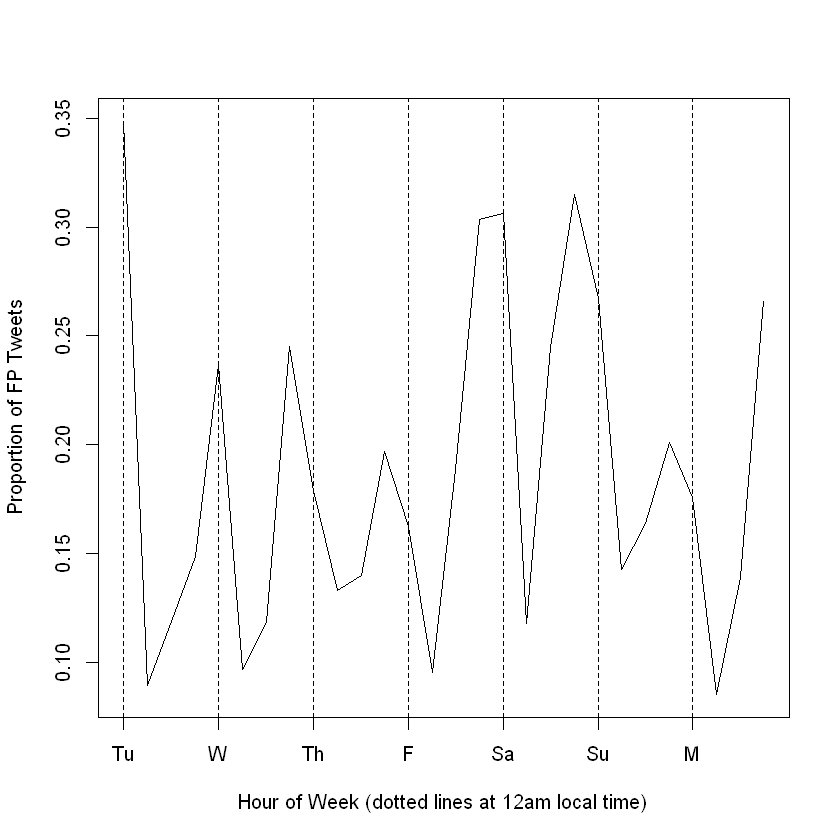

png 
  2

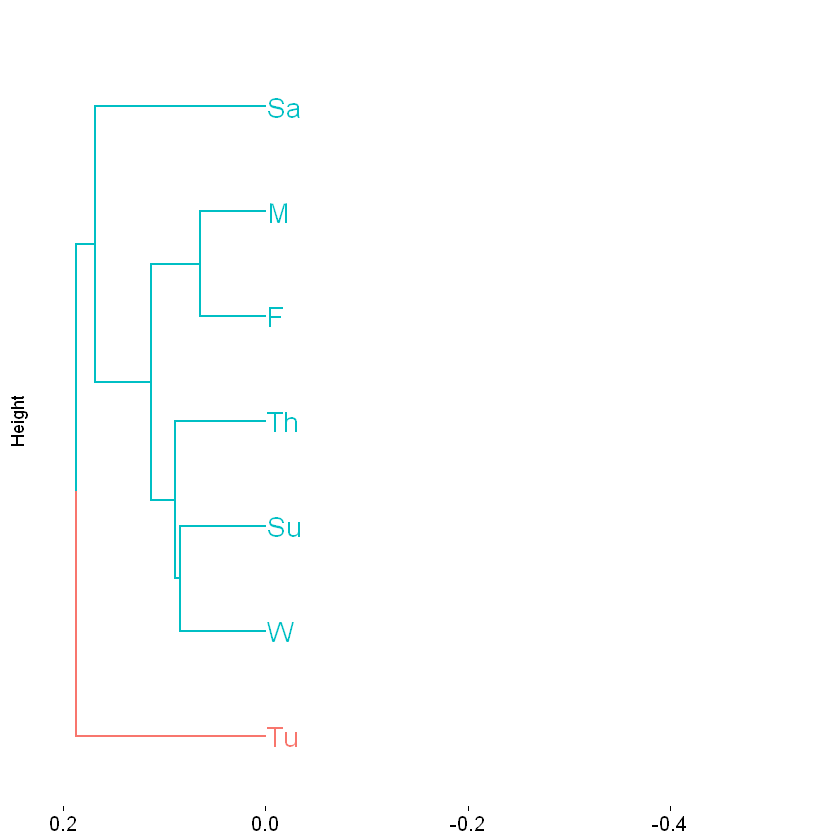

In [389]:
shisha_sum_6hour_plot <-function(){
shish.j <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv')
shish.s <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv')
fp.j <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv')
fp.s <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv')
j.sh <- shish.j[c(1,2,3)]
j.tot <- shish.j[c(1,2,4)]
j.proc <- preprocessing_df_6(j.sh, j.tot)
# j.ts <- ts((j.proc$series)[5:(28*4+4)], frequency=4)

j.fp <- fp.j[c(1,2,3)]
j.fp.proc <- preprocessing_df_6(j.fp, j.tot)
# j.fp.ts <- ts((j.fp.proc$series)[5:(28*4+4)], frequency=4)
j.ts <- ts((j.proc$series/j.fp.proc$series)[5:(28*4+4)], frequency=4)

s.sh <- shish.s[c(1,2,3)]
s.tot <- shish.s[c(1,2,4)]
s.proc <- preprocessing_df_6(s.sh, s.tot)

s.fp <- fp.s[c(1,2,3)]
s.fp.proc <- preprocessing_df_6(s.fp, s.tot)
s.ts <- ts((s.proc$series/s.fp.proc$series)[1:(28*4)], frequency=4)

j.1 <- as.numeric(window(j.ts, start=c(1, 1), end= c(7, 4)))
j.2 <- as.numeric(window(j.ts, start=c(8, 1), end= c(14, 4)))
j.3 <- as.numeric(window(j.ts, start=c(15, 1), end= c(21, 4)))
j.4 <- as.numeric(window(j.ts, start=c(22, 1), end= c(28, 4)))

s.1 <- as.numeric(window(s.ts, start=c(1, 1), end= c(7, 4)))
s.2 <- as.numeric(window(s.ts, start=c(8, 1), end= c(14, 4)))
s.3 <- as.numeric(window(s.ts, start=c(15, 1), end= c(21, 4)))
s.4 <- as.numeric(window(s.ts, start=c(22, 1), end= c(28, 4)))

ts.sum <- j.1 + j.2 + j.3 + j.4 + s.1 + s.2 + s.3 + s.4

plot(ts.sum, type='l', xaxt='n', xlab='Hour of Week (dotted lines at 12am local time)',
         ylab='Proportion of FP Tweets')
abline(v=seq(1, 28, by=4), lty=2)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 28, by=4))


weekdays = c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M')

days = split_by_day_6(ts.sum)
colnames(days)=weekdays
dist = diss(days, METHOD = 'EUCL')
c = agnes(dist, diss=TRUE)
euc_dend <-function(){
fviz_dend(c, rect=TRUE, main='', k=2,  ylab='', xlab='Height', 
          las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, cex=1.5)
}

euc_dend()
}

# pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-sum-6h-clust.pdf',width=6,height=4,paper='special') 
shisha_sum_6hour_plot()
# dev.off()

pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-sum-6h-clust.pdf',width=6,height=4,paper='special') 
shisha_sum_6hour_plot()
dev.off()

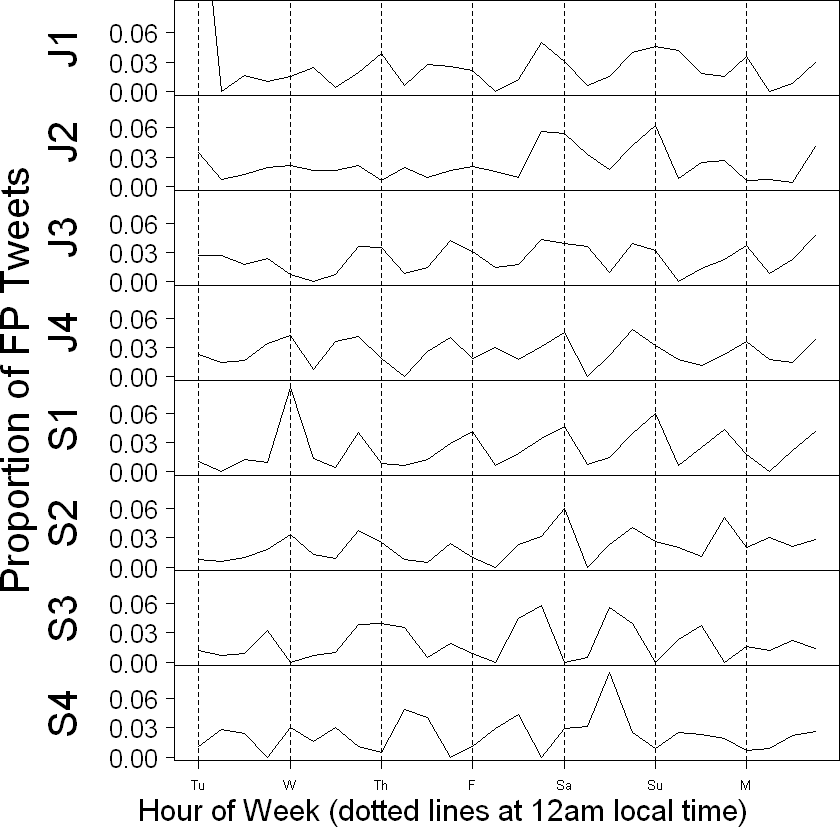

png 
  2

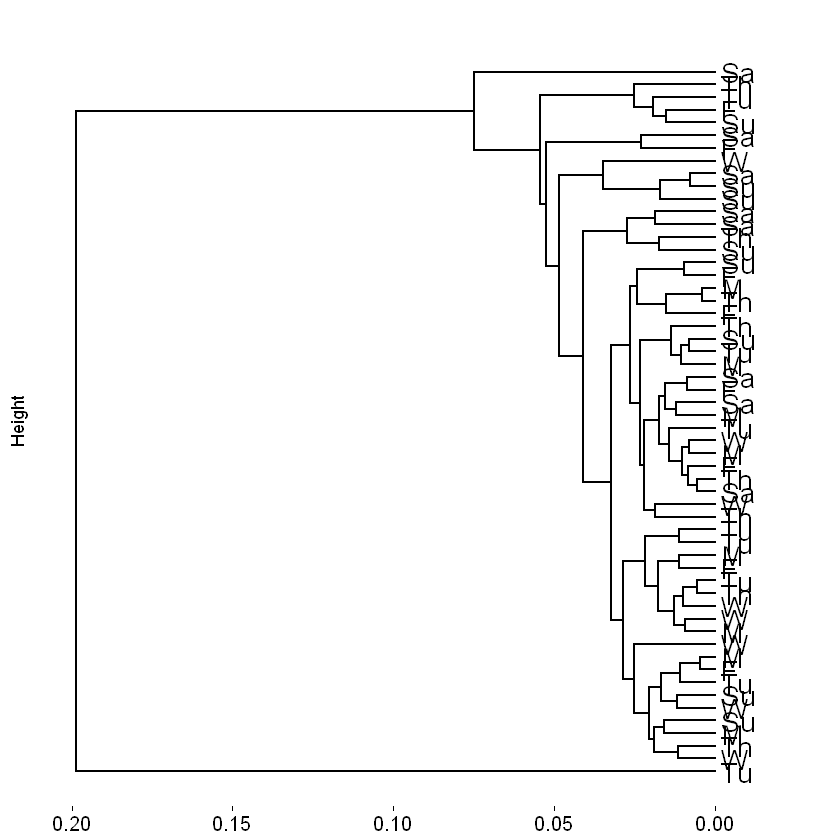

In [390]:
shisha_6hour_cluster<-function(){
    shish.j <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv')
shish.s <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv')
fp.j <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv')
fp.s <- read.csv('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv')
j.sh <- shish.j[c(1,2,3)]
j.tot <- shish.j[c(1,2,4)]
j.proc <- preprocessing_df_6(j.sh, j.tot)
# j.ts <- ts((j.proc$series)[5:(28*4+4)], frequency=4)

j.fp <- fp.j[c(1,2,3)]
j.fp.proc <- preprocessing_df_6(j.fp, j.tot)
# j.fp.ts <- ts((j.fp.proc$series)[5:(28*4+4)], frequency=4)
j.ts <- ts((j.proc$series/j.fp.proc$series)[5:(28*4+4)], frequency=4)

s.sh <- shish.s[c(1,2,3)]
s.tot <- shish.s[c(1,2,4)]
s.proc <- preprocessing_df_6(s.sh, s.tot)

s.fp <- fp.s[c(1,2,3)]
s.fp.proc <- preprocessing_df_6(s.fp, s.tot)
s.ts <- ts((s.proc$series/s.fp.proc$series)[1:(28*4)], frequency=4)

combined.ts <- ts(c((j.proc$series/j.fp.proc$series)[5:(28*4+4)], (s.proc$series/s.fp.proc$series)[1:(28*4)]), frequency=4)
split_by_day_6 <- function(ts_month){
      # ts_month: vector-like of hourly observations over month
      # returns matrix where cols are "days" and rows are hours
      days = data.frame(matrix(nrow=4, ncol=1))
      for (i in 1:(length(ts_month)/4)){
        days[[i]] = ts_month[((i-1)*4+1):(i*4)]
      }
      return(days)
    }



j.1 <- as.numeric(window(j.ts, start=c(1, 1), end= c(7, 4)))
j.2 <- as.numeric(window(j.ts, start=c(8, 1), end= c(14, 4)))
j.3 <- as.numeric(window(j.ts, start=c(15, 1), end= c(21, 4)))
j.4 <- as.numeric(window(j.ts, start=c(22, 1), end= c(28, 4)))

s.1 <- as.numeric(window(s.ts, start=c(1, 1), end= c(7, 4)))
s.2 <- as.numeric(window(s.ts, start=c(8, 1), end= c(14, 4)))
s.3 <- as.numeric(window(s.ts, start=c(15, 1), end= c(21, 4)))
s.4 <- as.numeric(window(s.ts, start=c(22, 1), end= c(28, 4)))

combined.df <- data.frame(j.1, j.2, j.3, j.4, s.1, s.2, s.3, s.4)
plot_max <- 0.09
plot_weeks <- function(ts){
    #     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
        week_names = c('J1', 'J2', 'J3', 'J4', 'S1', 'S2','S3', 'S4')
    par(mfrow=c(8,1))
    # outer margin
    par(oma = c(5, 3, 0, 0))

    shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
    for (col in 1:8){
        # remove space for x-axis
        par(mar = c(0, 8, 0, 0))
        yrange = c(0, plot_max)
        plot(ts[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
        title(cex.lab =3, ylab=week_names[col], line=6)
        axis(2, at=c(0, plot_max /3, 2*plot_max /3), las = 1, cex.axis=2)
        abline(v=seq(1, 28, by=4), lty=2)

    }
    mtext('Proportion of FP Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 12am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 28, by=4), outer=TRUE)
    }
plot_weeks(combined.df)
    
# dendogram
par(pin=c(4, 12))
weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8)
days = split_by_day_6(combined.ts)
colnames(days)=weekdays
dist = diss(days, METHOD = 'EUCL')
c = agnes(dist, diss=TRUE)
euc_dend <-function(){
fviz_dend(c, rect=TRUE, main='', ylab='', xlab='Height', 
          las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, cex=1.5)
}

euc_dend()
    

}
# pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-6h-clust.pdf',width=6,height=10,paper='special') 
shisha_6hour_cluster()
# dev.off()

pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-6h-clust.pdf',width=6,height=10,paper='special') 
shisha_6hour_cluster()
dev.off()

To get a better looking plot, we add up the weekly time series from the 8 weeks of september and june and plot by hour and day

In [276]:
total_by_day <- function(june, sept, show_plot=TRUE, name='Tweet'){
    j <- read.csv(june)
    s <- read.csv(sept)
    j.pres <- j[c(1,2,3)]
    j.tot <- j[c(1,2,4)]
    j.proc <- preprocessing_df(j.pres, j.tot)
    j.ts <- ts((j.proc$series)[33:(672+32)], frequency=24)
    
    s.pres <- s[c(1,2,3)]
    s.tot <- s[c(1,2,4)]
    s.proc <- preprocessing_df(s.pres, s.tot)
    s.ts <- ts((s.proc$series)[9:(672+8)], frequency=24)

    j.1 <- as.numeric(window(j.ts, start=c(1, 1), end= c(7, 24)))
    j.2 <- as.numeric(window(j.ts, start=c(8, 1), end= c(14, 24)))
    j.3 <- as.numeric(window(j.ts, start=c(15, 1), end= c(21, 24)))
    j.4 <- as.numeric(window(j.ts, start=c(22, 1), end= c(28, 24)))
    
    s.1 <- as.numeric(window(s.ts, start=c(1, 1), end= c(7, 24)))
    s.2 <- as.numeric(window(s.ts, start=c(8, 1), end= c(14, 24)))
    s.3 <- as.numeric(window(s.ts, start=c(15, 1), end= c(21, 24)))
    s.4 <- as.numeric(window(s.ts, start=c(22, 1), end= c(28, 24)))
    
    combined.ts <- j.1 + j.2 + j.3 + j.4 + s.1 + s.2 + s.3 + s.4
    
    if (show_plot){
    par(pin=c(6, 2.5))
    plot(combined.ts, type='l', xaxt='n', xlab='Hour of Week (dotted lines at 8am local time)',
         ylab='Total Tweets', main=paste('Combined', name, 'Count by day and hour from June and September'))
    abline(v=seq(1, 168, by=24), lty=2)
    axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24))
    }
    
    combined.ts
    
}

# Present

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1]  84  82 122 128 107 127 113 125 140 153 137 178 199 211 214 199 164 125
 [19]  76  44  35  32  49  66 103 112 118 136 130 117 144 155 138 139 166 166
 [37] 194 231 203 206 164 108  71  63  39  29  45  72  95 105 126 138 137 131
 [55] 120 143 144 139 171 183 219 218 196 177 150 113  83  45  32  30  40  69
 [73]  90  99 111 122 125 129 143 124 116 142 135 194 230 217 218 243 213 139
 [91] 103  74  40  31  35  43  90  91 127 161 133 145 135 137 168 162 163 206
[109] 219 237 240 235 201 157 126  69  31  30  30  61  77 113 130 137 164 162
[127] 155 157 149 136 155 236 224 260 256 185 165 118  69  40  38  21  34  46
[145]  73  97 125 121 125 132 119 139 113 140 144 173 207 228 185 200 156 102
[163]  81  36  26  32  55  81

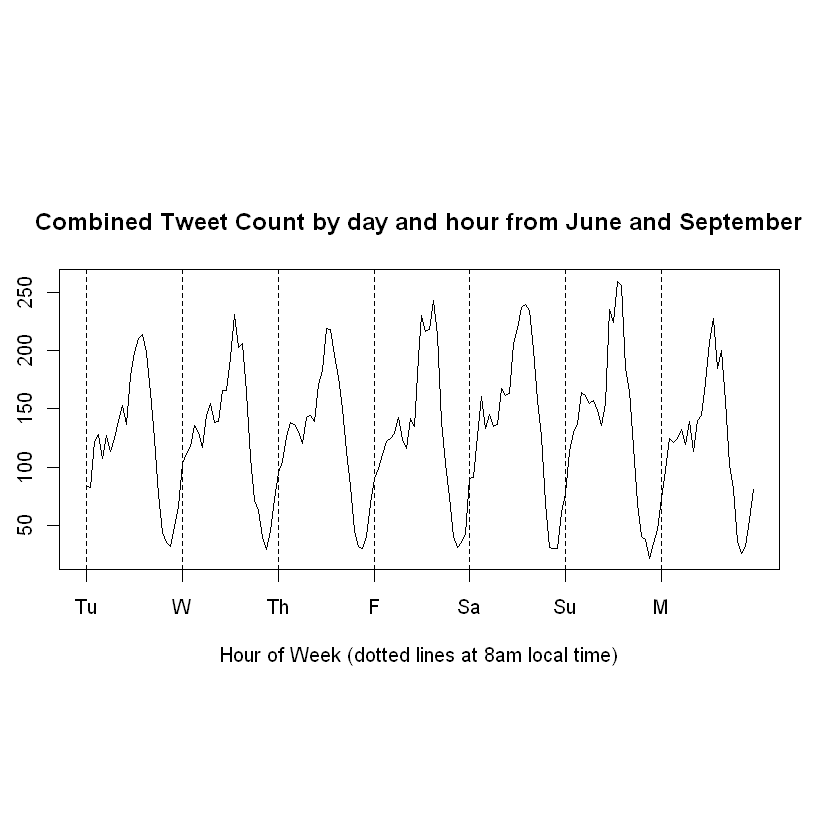

In [382]:
total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/present.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/present.csv')

# Current

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1] 139 159 199 215 220 230 224 233 262 269 266 341 362 367 384 343 300 230
 [19] 126  87  60  53  73 114 152 183 214 248 243 234 260 288 260 256 305 299
 [37] 351 396 358 375 278 206 128  95  59  42  80 120 152 187 206 239 260 239
 [55] 229 253 265 260 286 333 370 358 344 321 268 225 142  79  57  53  66 111
 [73] 145 163 226 230 253 234 246 240 232 267 254 348 394 389 386 423 401 259
 [91] 165 124  62  44  54  70 139 167 224 275 271 322 290 297 302 276 309 376
[109] 391 417 425 425 347 276 208 119  66  51  39  84 115 190 220 272 275 298
[127] 276 293 284 248 275 354 357 419 399 329 289 212 145  87  61  38  56  75
[145] 146 174 211 213 233 247 229 253 237 275 275 319 367 417 377 359 285 202
[163] 131  65  50  52  84 114

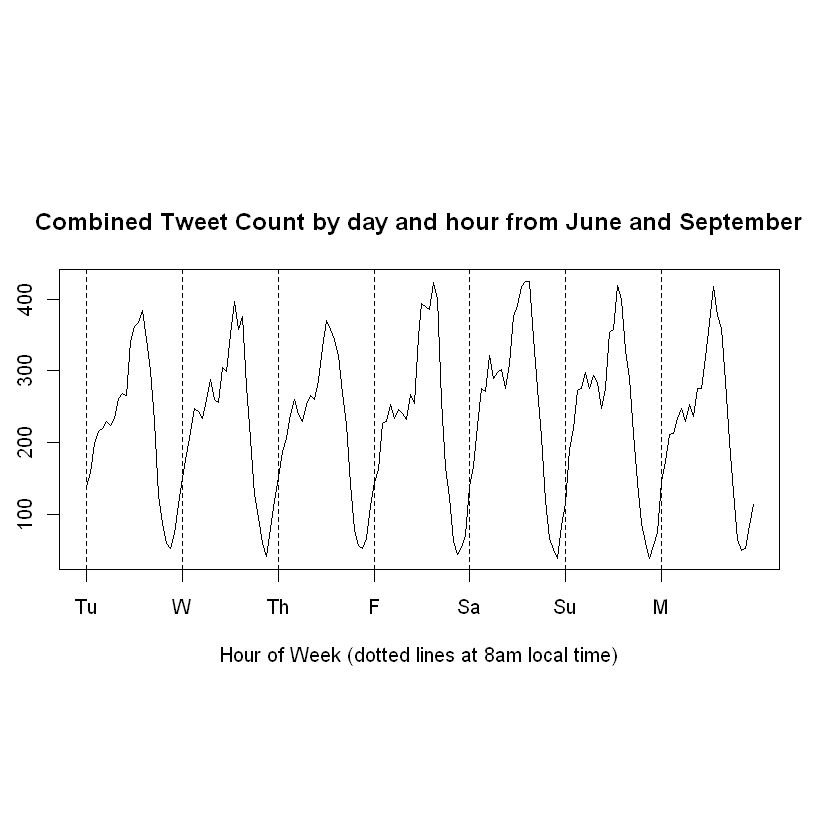

In [383]:
total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/current.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/current.csv')

# Shisha

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1]  0  1  3  4  2  5  6  3  4  5  8  9 10  7 15  3  9 11  3  3  1  1  0  0  2
 [26]  3  4  5  2  5  5  5  3  5  6  9 13 13 16 17 13  7  2  4  0  0  2  0  0  2
 [51]  3  5  6  2  3  7  3  7  8 11 13 15 17  8 10  8  2  2  2  0  0  1  0  6  0
 [76]  5  4  6  6  3  1  3  7  6 18 26 21 29 26 19 10  3  3  2  1  0  2  4  4  4
[101]  8  4  4  6  3  8 15 14 11 22 27 40 25 12 16  6  1  2  4  0  1  2  3  5  6
[126]  4  6  6  8  6 10 11  8 13 13 14 11  6  4  2  2  0  0  0  2  5  2  3  4  6
[151]  9  2  1  3  6 14 18 19 10 13  7  7  2  3  0  0  1  1

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1]  0  1  3  4  2  5  6  3  4  5  8  9 10  7 15  3  9 11  3  3  1  1  0  0  2
 [26]  3  4  5  2  5  5  5  3  5  6  9 13 13 16 17 13  7  2  4  0  0  2  0  0  2
 [51]  3  5  6  2  3  7  3  7  8 11 13 15 17  8 10  8  2  2  2  0  0  1  0  6  0
 [76]  5  4  6  6  3  1  3  7  6 18 26 21 29 26 19 10  3  3  2  1  0  2  4  4  4
[101]  8  4  4  6  3  8 15 14 11 22 27 40 25 12 16  6  1  2  4  0  1  2  3  5  6
[126]  4  6  6  8  6 10 11  8 13 13 14 11  6  4  2  2  0  0  0  2  5  2  3  4  6
[151]  9  2  1  3  6 14 18 19 10 13  7  7  2  3  0  0  1  1

png 
  2

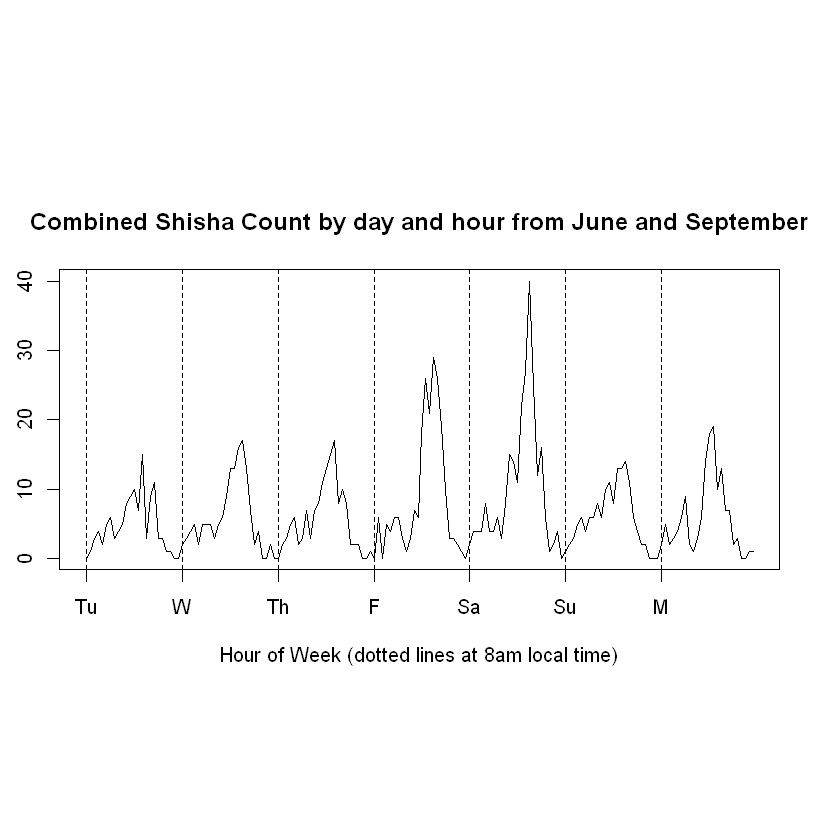

In [396]:
total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv', name='Shisha')
pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-sum.pdf',width=7,height=4,paper='special') 
total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv', name='Shisha')
dev.off()

# First person tobacco


 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1] 160 183 227 252 258 268 257 266 310 318 309 391 415 419 457 399 348 266
 [19] 142 103  67  60  78 133 168 210 242 291 296 268 290 327 301 310 340 350
 [37] 412 450 426 432 338 247 146 112  72  46  87 139 173 211 240 285 309 270
 [55] 263 282 313 301 325 376 424 425 402 386 324 267 175  94  70  64  76 132
 [73] 162 200 256 288 296 273 291 266 282 312 290 401 444 464 467 508 491 327
 [91] 215 154  85  59  63  89 170 194 274 324 306 374 332 339 339 313 360 443
[109] 468 495 518 525 432 372 269 151  85  65  47  95 138 220 258 317 324 362
[127] 324 345 325 287 331 409 413 478 462 391 338 260 168 105  73  53  63  90
[145] 163 212 244 255 264 287 263 306 276 312 318 370 406 481 439 412 327 257
[163] 154  81  66  58 100 138

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1] 160 183 227 252 258 268 257 266 310 318 309 391 415 419 457 399 348 266
 [19] 142 103  67  60  78 133 168 210 242 291 296 268 290 327 301 310 340 350
 [37] 412 450 426 432 338 247 146 112  72  46  87 139 173 211 240 285 309 270
 [55] 263 282 313 301 325 376 424 425 402 386 324 267 175  94  70  64  76 132
 [73] 162 200 256 288 296 273 291 266 282 312 290 401 444 464 467 508 491 327
 [91] 215 154  85  59  63  89 170 194 274 324 306 374 332 339 339 313 360 443
[109] 468 495 518 525 432 372 269 151  85  65  47  95 138 220 258 317 324 362
[127] 324 345 325 287 331 409 413 478 462 391 338 260 168 105  73  53  63  90
[145] 163 212 244 255 264 287 263 306 276 312 318 370 406 481 439 412 327 257
[163] 154  81  66  58 100 138

png 
  2

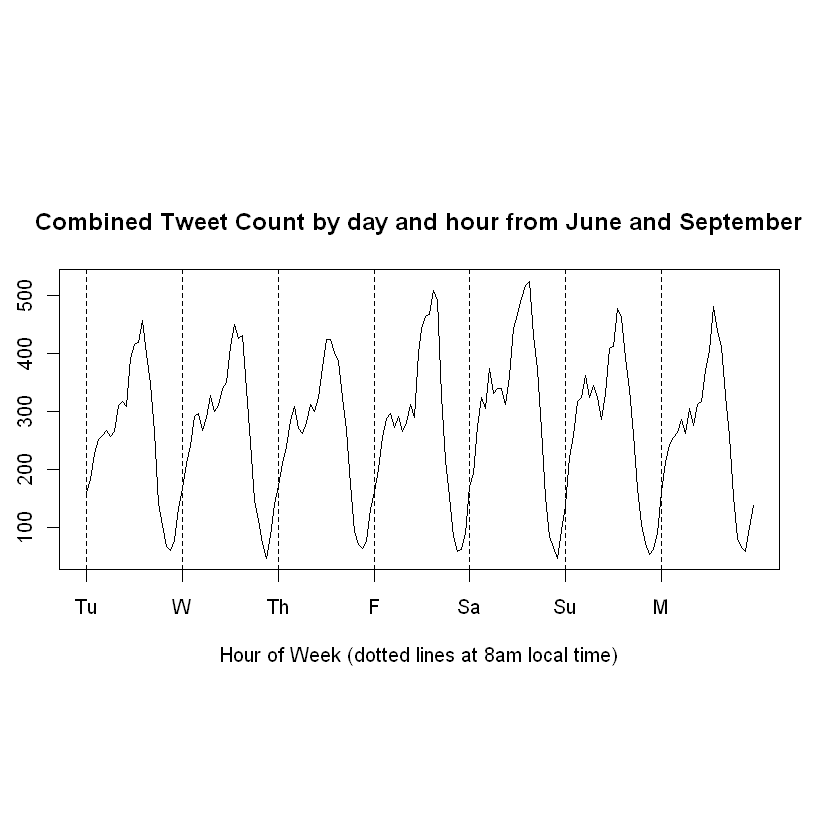

In [397]:
total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv')
pdf('c:/users/tom/documents/nyu-test/tob-plots/fp-sum.pdf',width=7,height=4,paper='special') 
total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv', name='FP')
dev.off()

# Proportion of shisha to first person

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1] 168

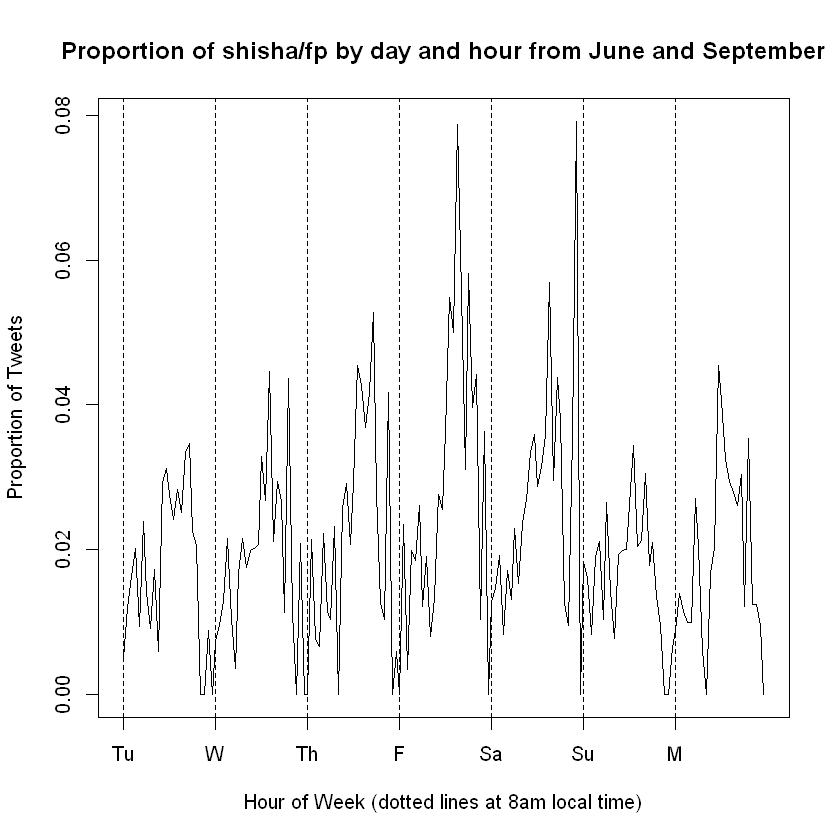

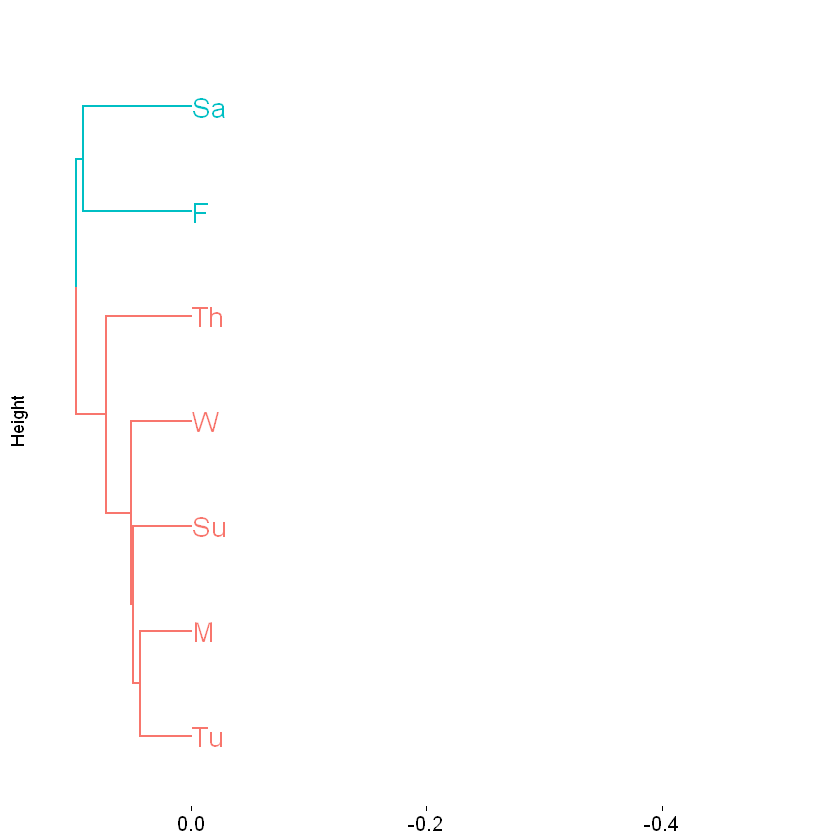

In [410]:
j.ts <- plot_prop('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv',
          'c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv', 0.3, show_plot=FALSE)
s.ts <- plot_prop('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv',
          'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv', 0.3, show_plot=FALSE)
# j.1 <- as.numeric(window(j.ts, start=c(1, 1), end= c(7, 24)))
# j.2 <- as.numeric(window(j.ts, start=c(8, 1), end= c(14, 24)))
# j.3 <- as.numeric(window(j.ts, start=c(15, 1), end= c(21, 24)))
# j.4 <- as.numeric(window(j.ts, start=c(22, 1), end= c(28, 24)))

# s.1 <- as.numeric(window(s.ts, start=c(1, 1), end= c(7, 24)))
# s.2 <- as.numeric(window(s.ts, start=c(8, 1), end= c(14, 24)))
# s.3 <- as.numeric(window(s.ts, start=c(15, 1), end= c(21, 24)))
# s.4 <- as.numeric(window(s.ts, start=c(22, 1), end= c(28, 24)))

# proportion.ts <- j.1 + j.2 + j.3 + j.4 + s.1 + s.2 + s.3 + s.4
proportion.ts <- (rowSums(j.ts) + rowSums(s.ts))/8
# pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-sum-prop.pdf',width=7,height=4,paper='special') 
plot(proportion.ts, type='l', xaxt='n', xlab='Hour of Week (dotted lines at 8am local time)',
     ylab='Proportion of Tweets', main='Proportion of shisha/fp by day and hour from June and September')
abline(v=seq(1, 168, by=24), lty=2)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24))
# dev.off()
length(proportion.ts)

# dendogram
weekdays = c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M')
june_days = split_by_day(proportion.ts)
colnames(june_days)=weekdays
dist = diss(june_days, METHOD = 'EUCL')
c = agnes(dist, diss=TRUE)
euc_dend <-function(){
fviz_dend(c, rect=TRUE, k=2, main='', ylab='', xlab='Height', 
          las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, c, ex=1.5)
}
euc_dend()
# dev.off()

Quotient of sums, dont use this

In [395]:
shisha <- total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv', show_plot=FALSE)
fp <- total_by_day('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/present.csv',
            'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/present.csv', show_plot=FALSE)
proportion.ts <- shisha/fp
par(pin=c(6, 2.5))
pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-sum-prop.pdf',width=7,height=4,paper='special') 
plot(proportion.ts, type='l', xaxt='n', xlab='Hour of Week (dotted lines at 8am local time)',
     ylab='Proportion of Tweets', main='Proportion of shisha/fp by day and hour from June and September')
abline(v=seq(1, 168, by=24), lty=2)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24))
# dev.off()
length(proportion.ts)

# dendogram
weekdays = c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M')
june_days = split_by_day(proportion.ts)
colnames(june_days)=weekdays
dist = diss(june_days, METHOD = 'EUCL')
c = agnes(dist, diss=TRUE)
euc_dend <-function(){
fviz_dend(c, rect=TRUE, k=2, main='', ylab='', xlab='Height', 
          las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, c, ex=1.5)
}
# pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-sum-cluster.pdf',width=4,height=4,paper='special') 
euc_dend()
dev.off()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


[1] 168

png 
  2

In [3]:
time_index <- function(df){
  #indexes a dataframe by 30 days and 24 hours
  
  times = data.frame()
  for (d in 1:30){
    for (h in 0:23){
      times = rbind(times, c(d, h, 0))
    }
  }
  colnames(times) = c('day', 'hour', 'tweets')
  colnames(df) = c('day', 'hour', 'tweets')
  merged = merge(times, df, by=c('day', 'hour'), all='TRUE')
  merged[is.na(merged)] = 0
  merged['tweets'] = pmax(merged$tweets.x,merged$tweets.y)
  return (merged)
}

In [4]:
preprocessing_df <- function(ts, total, thres=5000){
  
  # removes rows with low observations and locfs them
  # returns time series and total time series, as a list
  
  df = time_index(data.frame(ts))
  df_total = time_index(data.frame(total))
  
  missing = df_total[,'tweets']<thres
  print(which(missing))
  df_total[missing, 'tweets'] <- NA
  df[missing,] <-NA
  df_total = na.locf(df_total[,'tweets'])
  df_filled = (na.locf(df[, ncol(df)]))
  
  return(list(series=df_filled, total=df_total))
}

In [65]:
time_index_6 <- function(df){
  #indexes a dataframe by 30 days and 24 hours in 6 hour blocks
  for (i in 1:nrow(df)){
      df[i, 'hour'] <- 6*(df[i, 'hour']%/%6)
  }
  times = data.frame()

  for (d in 1:30){
    for (h in c(0,6,12,18)){
    tot = sum(df[(24*(d-1) + h+1):(24*(d-1)+h+6), 3])
    times = rbind(times, c(d, h, tot))
    }
  }
    colnames(times) = c('day', 'hour', 'tweets')
#   merged = merge(times, df, by=c('day', 'hour'), all='TRUE')
#   merged[is.na(merged)] = 0
#   merged['tweets'] = pmax(merged$tweets.x,merged$tweets.y)
#   return (merged)
    times
}

In [185]:
preprocessing_df_6 <- function(ts, total, thres=5000){
  
  # removes rows with low observations and locfs them
  # returns time series and total time series, as a list
  
  df = time_index_6(data.frame(ts))
  df_total = time_index_6(data.frame(total))
  
#   missing = df_total[,'tweets']<thres
#   print(which(missing))
#   df_total[missing, 'tweets'] <- NA
#   df[missing,] <-NA
#   df_total = na.locf(df_total[,'tweets'])
#   df_filled = (na.locf(df[, ncol(df)]))
  
  return(list(series=df[,"tweets"], total=df_total))
}

In [114]:
head(time_index_6(tot))

day,hour,tweets
1,0,17772
1,6,40197
1,12,58417
1,18,56929
2,0,16354
2,6,37406


First we plot and cluster the hourly sampled series for present, current, and shisha, as absolute number of tweets per hour.

In [143]:
plot_all <- function(fcsv, plot_max, date_range=33:(672+32) ){
    j_tob <- read.csv(fcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    new <- preprocessing_df(pres, tot)
    ts_pres <- ts((new$series)[date_range], frequency=24)
    pres.1 = as.numeric(window(ts_pres, start=c(1, 1), end= c(7, 24)))
    pres.2 = as.numeric(window(ts_pres, start=c(8, 1), end= c(14, 24)))
    pres.3 = as.numeric(window(ts_pres, start=c(15, 1), end= c(21, 24)))
    pres.4 = as.numeric(window(ts_pres, start=c(22, 1), end= c(28, 24)))
    abs_tob = data.frame(pres.1, pres.2, pres.3, pres.4)
    plot_weeks <- function(ts){
    #     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
        week_names = c('J1', 'J2', 'J3', 'J4')
    par(mfrow=c(4,1))
    # outer margin
    par(oma = c(5, 3, 0, 0))

    shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
    for (col in 1:4){
        # remove space for x-axis
        par(mar = c(0, 8, 0, 0))
        yrange = c(0, plot_max)
        plot(ts[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
        title(cex.lab =3, ylab=week_names[col], line=6)
        axis(2, at=c(0, plot_max %/%3, 2*plot_max %/%3), las = 1, cex.axis=2)
        abline(v=seq(1, 168, by=24), lty=2)

    }

mtext('Total Present Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
    plot_weeks(abs_tob)
    
    # dendogram
    weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 4)
    june_days = split_by_day(ts_pres)
    colnames(june_days)=weekdays
    dist = diss(june_days, METHOD = 'EUCL')
    c = agnes(dist, diss=TRUE)
    euc_dend <-function(){
    fviz_dend(c, rect=TRUE, main='', ylab='', xlab='Height', 
              las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
        #mtext( text='Day of Week', side=2, cex=1.5)
    }
    euc_dend()
    
}


# Absolute number of Present tweets per hour in June

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


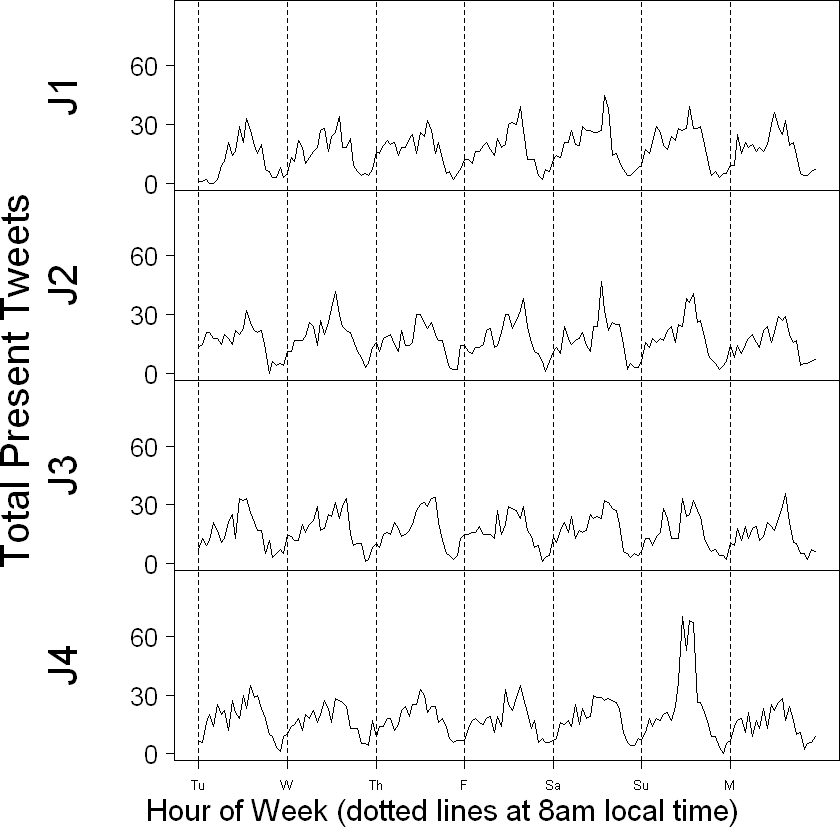

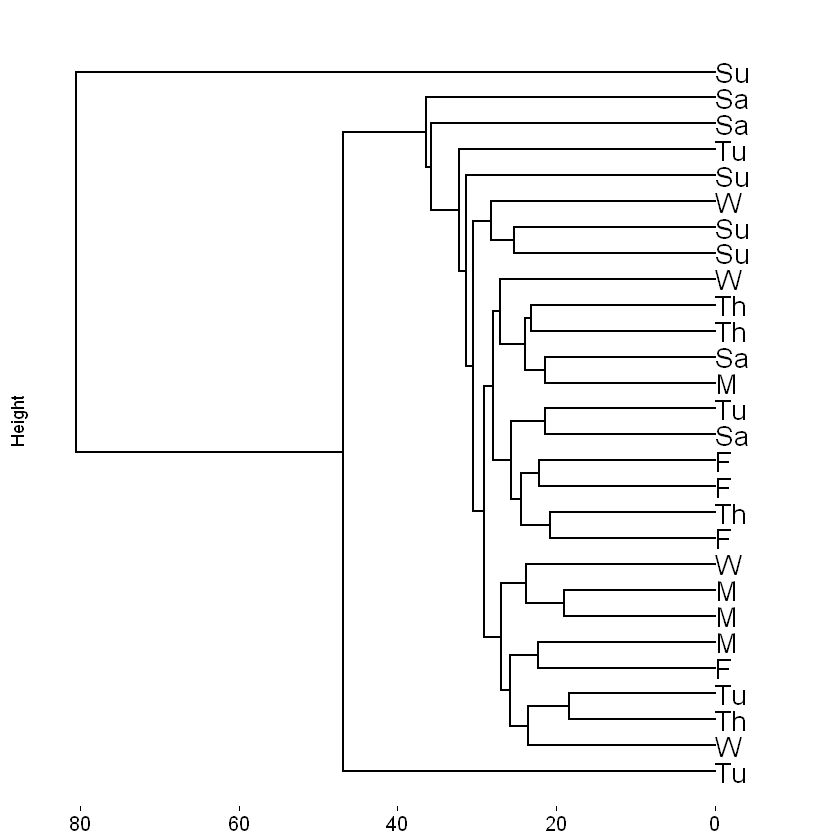

In [359]:

plot_all('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/present.csv', 90) 

# Absolute number of Current tweets per hour in June

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


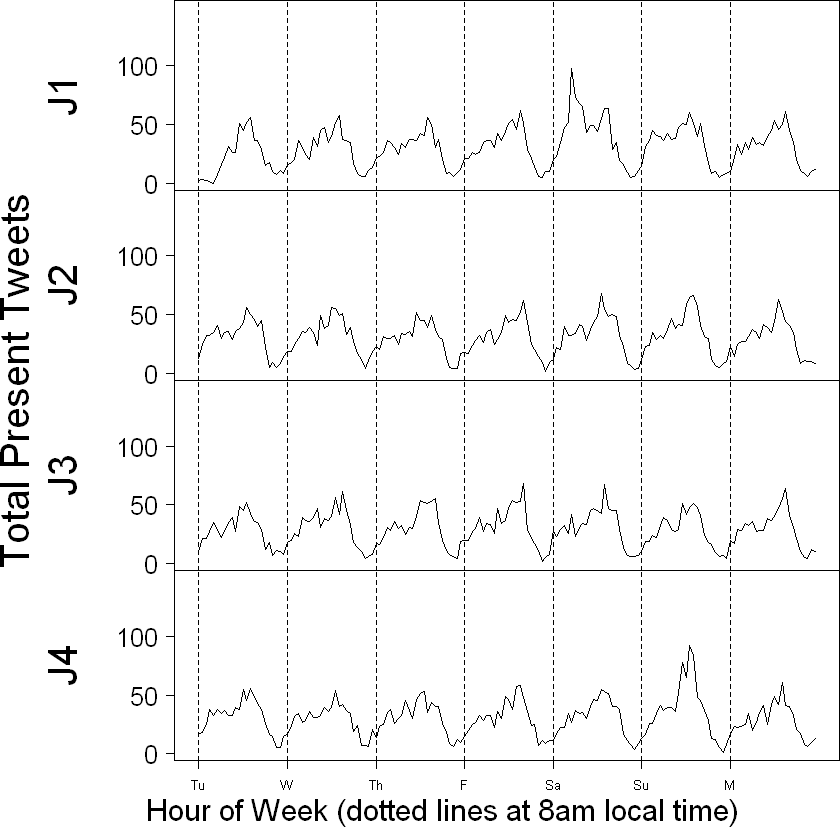

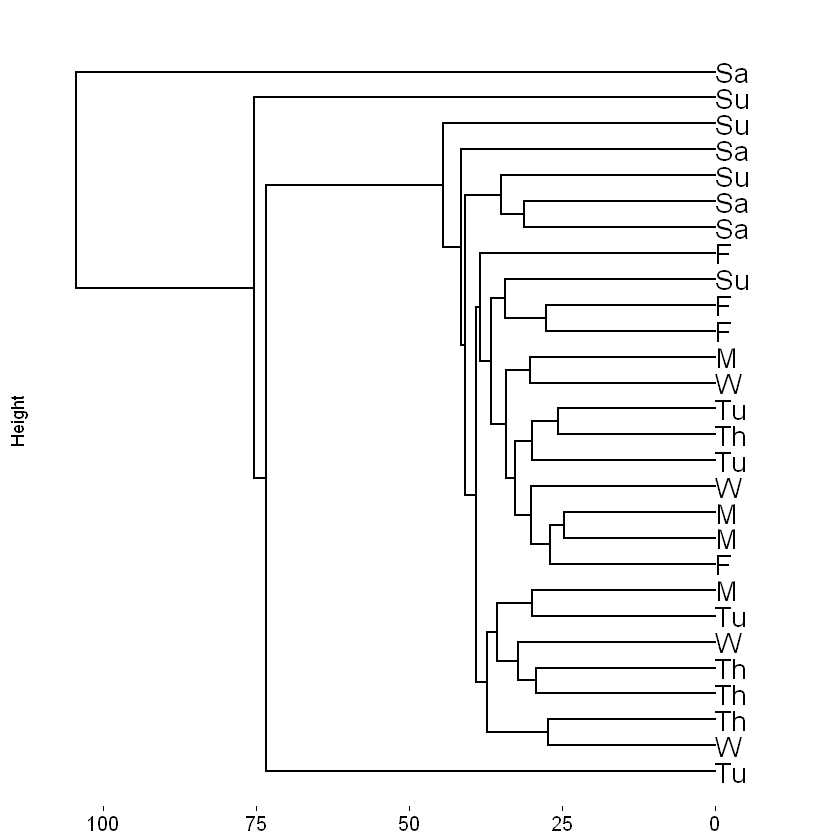

In [360]:

plot_all('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/current.csv', 150)

# Absolute number of (Shisha & current) tweets per hour in June

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


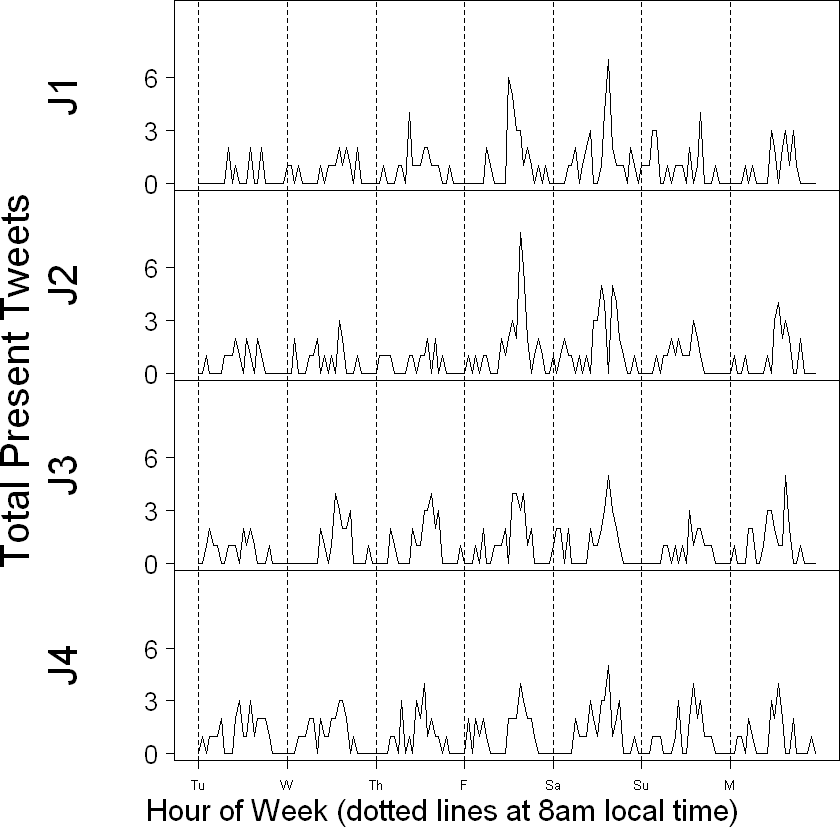

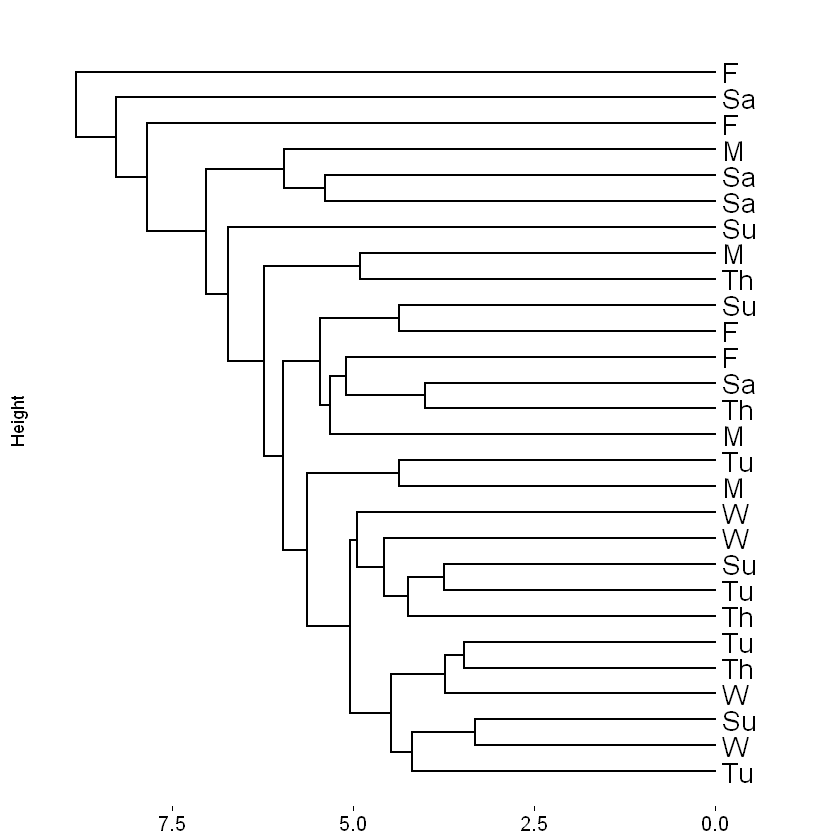

In [361]:
plot_all('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv', 10)

Now we do the same thing but group into 6 hours periods (12am-5am, 6am-11am, 12pm-5pm, 6pm-11pm, inclusive)

In [176]:
plot_6hour <- function(fcsv, plot_max, date_range=5:(4*28+5)){
    j_tob <- read.csv(fcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    new <- preprocessing_df_6(pres, tot)
    ts_pres <- ts((new$series)[date_range], frequency=4)
    pres.1 = as.numeric(window(ts_pres, start=c(1, 1), end= c(7, 4)))
    pres.2 = as.numeric(window(ts_pres, start=c(8, 1), end= c(14, 4)))
    pres.3 = as.numeric(window(ts_pres, start=c(15, 1), end= c(21, 4)))
    pres.4 = as.numeric(window(ts_pres, start=c(22, 1), end= c(28, 4)))
    abs_tob = data.frame(pres.1, pres.2, pres.3, pres.4)
    plot_weeks <- function(ts){
    #     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4')
    par(mfrow=c(4,1))
    # outer margin
    par(oma = c(5, 3, 0, 0))

    shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
    for (col in 1:4){
        # remove space for x-axis
        par(mar = c(0, 8, 0, 0))
        yrange = c(0, plot_max)
        plot(ts[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
        title(cex.lab =3, ylab=week_names[col], line=6)
        axis(2,  at=c(0, plot_max %/%3,  2*plot_max %/%3), las = 1, cex.axis=2)
        abline(v=seq(1, 28, by=4), lty=2)

    }

mtext('Total Present Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 12am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 28, by=4), outer=TRUE)

    
}
    plot_weeks(abs_tob)
    
    split_by_day_6 <- function(ts_month){
      # ts_month: vector-like of hourly observations over month
      # returns matrix where cols are "days" and rows are hours
      days = data.frame(matrix(nrow=4, ncol=1))
      for (i in 1:(length(ts_month)/4)){
        days[[i]] = ts_month[((i-1)*4+1):(i*4)]
      }
      return(days)
    }
    # dendogram
    weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 4)
    june_days = split_by_day_6(ts_pres)
    colnames(june_days)=weekdays
    dist = diss(june_days, METHOD = 'EUCL')
    c = agnes(dist, diss=TRUE)
    euc_dend <-function(){
    fviz_dend(c, rect=TRUE, main='', ylab='', xlab='Height', 
              las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
        #mtext( text='Day of Week', side=2, cex=1.5)
    }
    euc_dend()
    }


# Absolute number of Present tweets per 6 hours in June

  [1]   4   4  57 145  54  62 102 146  65  83 114 149  61  62 110 168  69  73
 [19] 143 189  55  76 137 178  72  68 109 172  67  83 104 145  65  65 127 175
 [37]  82  82  96 151  67  64 100 163 105  65 103 160  98  59 113 190  69  56
 [55] 104 146  67  54 108 158  59  65 124 150  78  59 100 170  78  79 104 142
 [73]  78  70 103 158  89  50 107 154  62  56  95 145  54  62 120 156  93  67
 [91] 108 147  73  76 110 158  86  69  98 158  93  58 112 162  97  62 117 321
[109]  83  61  94 131  69


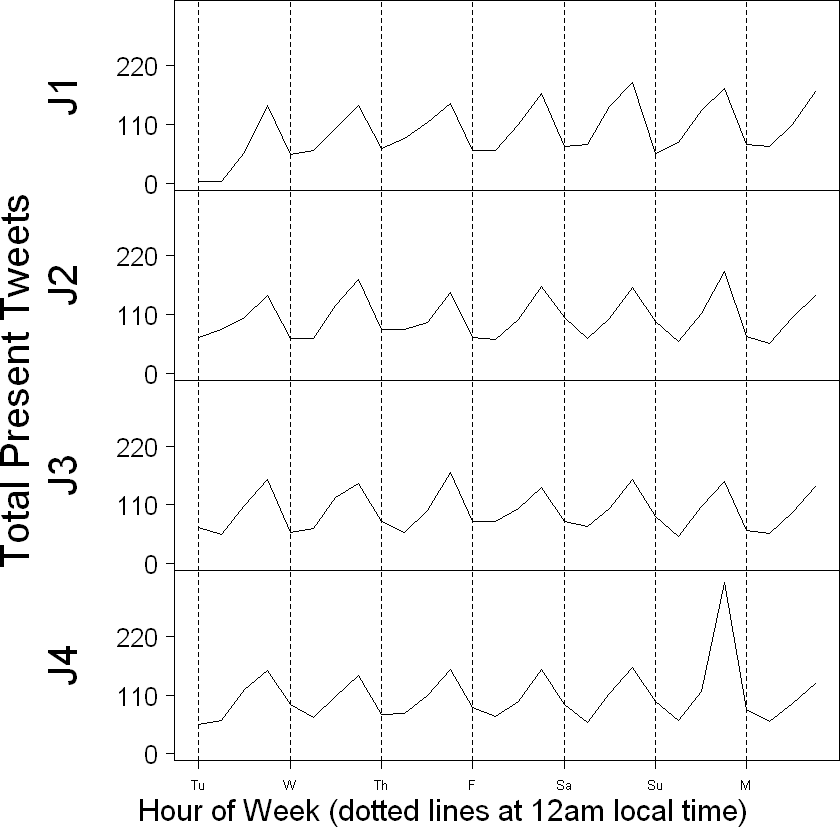

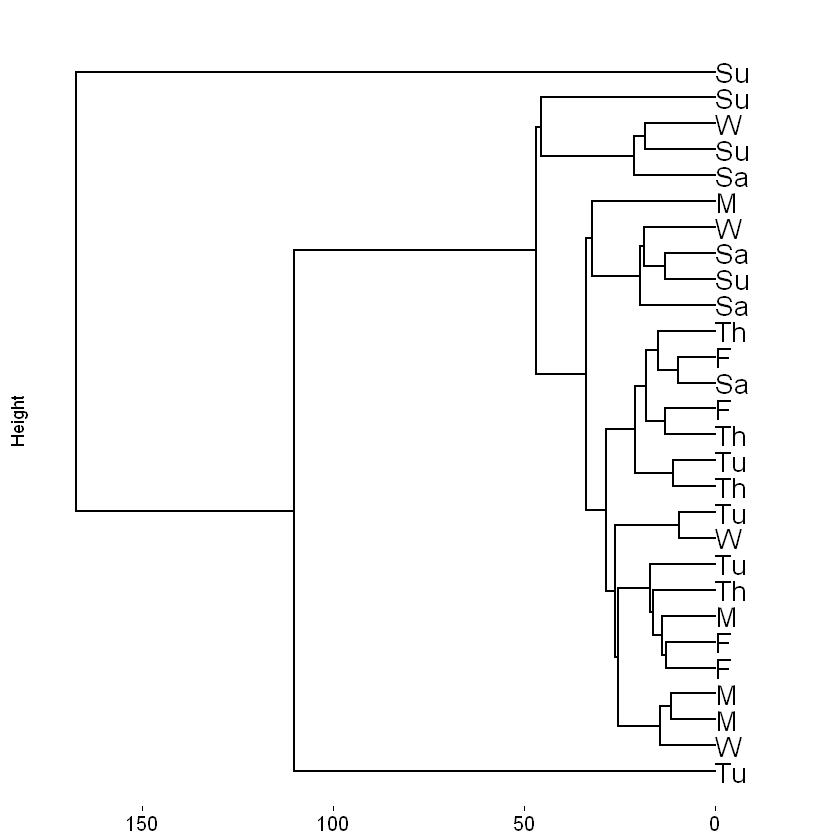

In [362]:
plot_6hour('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/present.csv', plot_max=330)

# Absolute number of Current tweets per 6 hours in June

  [1]   8   8 102 266 115 108 189 269 108 131 190 262 110 113 205 293 126 145
 [19] 399 325 113 143 234 299 123 104 203 295 125 124 206 269 126 115 218 290
 [37] 132 134 190 261 119 108 184 270 173 105 208 298 168 101 213 330 126 107
 [55] 202 278 125  97 187 252 112 105 229 274 124 100 182 280 135 120 206 278
 [73] 148 125 189 294 146  85 186 269 114 105 185 281 112 119 208 282 143 126
 [91] 186 250 128 124 209 259 139 109 185 278 151  92 197 290 153  94 226 419
[109] 140  94 182 260 125


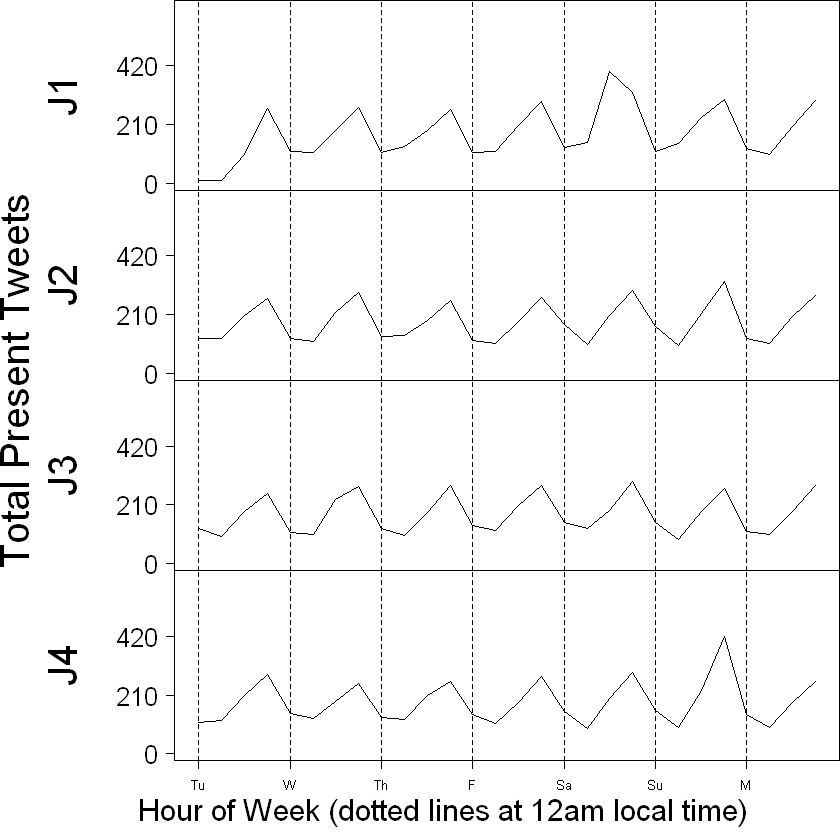

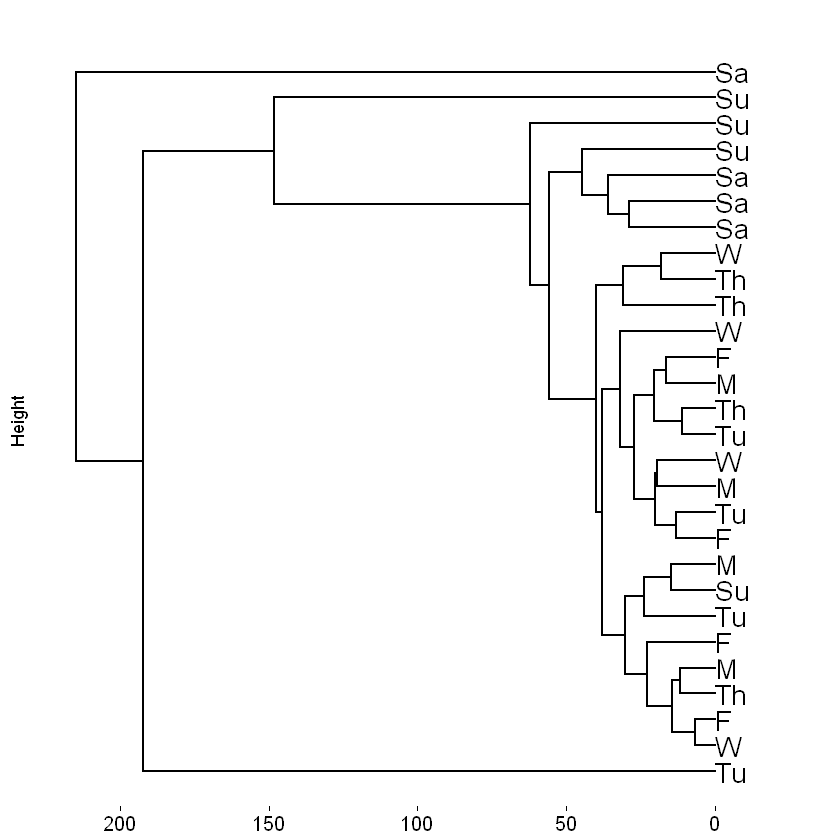

In [363]:
plot_6hour('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/current.csv', plot_max=630)

# Absolute number of (Shisha and present) tweets per 6 hours in June

  [1]  2  0  2  3  2  3  1  6  5  1  6  8  3  0  3 17  5  1  7 15  7  7  5  5  5
 [26]  0  2 10  5  1  3  6  3  2  4  7  1  3  2  5  3  2  2 18 12  4  4 15 12  1
 [51]  6 10  1  1  1 13  4  3  4  7  1  0  2 11  5  1  3 14  5  2  4 14  7  5  2
 [76] 14  6  0  3  7  5  1  5 15  3  2  4 11  7  1  8 12  3  0  6 12  3  4  4 10
[101]  8  0  5 17  6  2  3 11  6  2  3 11  2


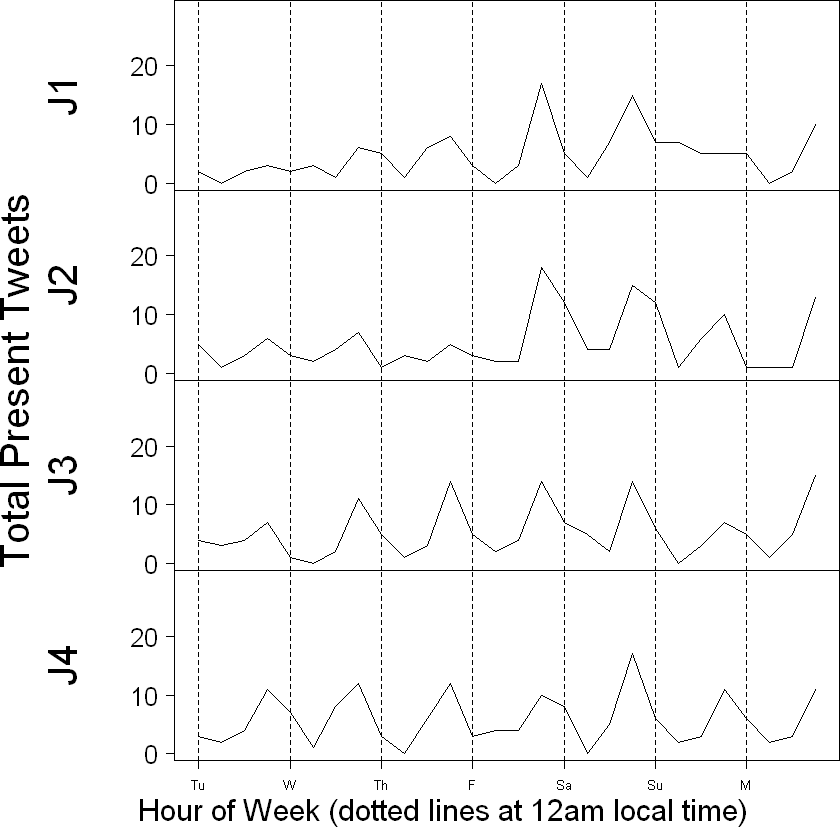

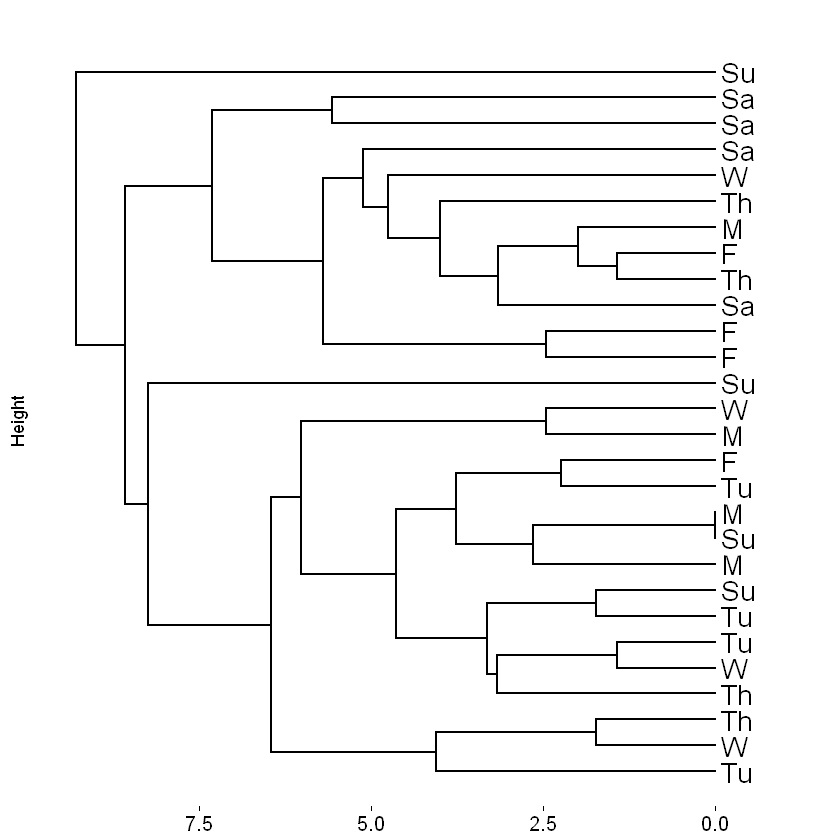

In [364]:
plot_6hour('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv', plot_max = 30)

# Proportion of Shisha to First person tobacco tweets, June

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


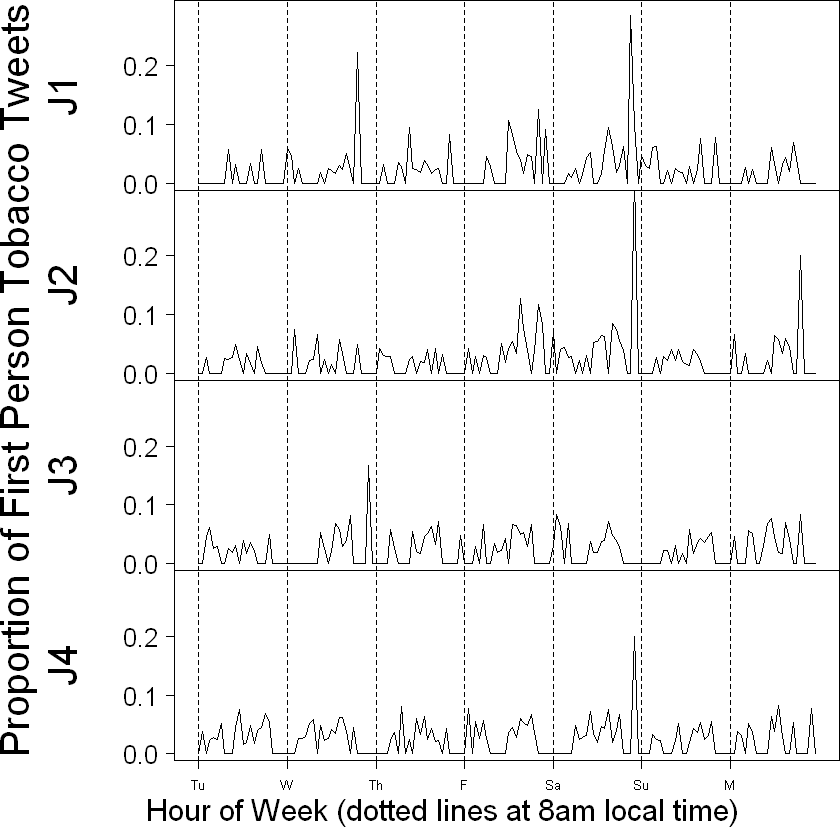

In [399]:
plot_prop <- function(scsv, fcsv, plot_max, date_range=33:(672+32), show_plot=TRUE){
    j_shi <- read.csv(scsv)
    j_tob <- read.csv(fcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    shi <- j_shi[c(1,2,3)]
    new <- preprocessing_df(pres, tot)
    new_shi <- preprocessing_df(shi, tot)
    ts_pres <- ts((new_shi$series/new$series)[date_range], frequency=24)
    pres.1 = as.numeric(window(ts_pres, start=c(1, 1), end= c(7, 24)))
    pres.2 = as.numeric(window(ts_pres, start=c(8, 1), end= c(14, 24)))
    pres.3 = as.numeric(window(ts_pres, start=c(15, 1), end= c(21, 24)))
    pres.4 = as.numeric(window(ts_pres, start=c(22, 1), end= c(28, 24)))
    abs_tob = data.frame(pres.1, pres.2, pres.3, pres.4)
    plot_weeks <- function(ts){
    #     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
        week_names = c('J1', 'J2', 'J3', 'J4')
    par(mfrow=c(4,1))
    # outer margin
    par(oma = c(5, 3, 0, 0))

    shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
    for (col in 1:4){
        # remove space for x-axis
        par(mar = c(0, 8, 0, 0))
        yrange = c(0, plot_max)
        plot(ts[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
        title(cex.lab =3, ylab=week_names[col], line=6)
        axis(2, at=c(0, plot_max /3, 2*plot_max /3), las = 1, cex.axis=2)
        abline(v=seq(1, 168, by=24), lty=2)

    }

mtext('Proportion of First Person Tobacco Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
if (show_plot){
    plot_weeks(abs_tob)
    
    # dendogram
    weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 4)
    june_days = split_by_day(ts_pres)
    colnames(june_days)=weekdays
    dist = diss(june_days, METHOD = 'EUCL')
    c = agnes(dist, diss=TRUE)
    euc_dend <-function(){
    fviz_dend(c, rect=TRUE, main='', ylab='', xlab='Height', 
              las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
        #mtext( text='Day of Week', side=2, cex=1.5)
    }
    euc_dend()
}
return(abs_tob)
}
# pdf('c:/users/tom/documents/nyu-test/tob-plots/shisha-hourly-cluster.pdf',width=6,height=8,paper='special') 
a <- plot_prop('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/shisha.csv',
          'c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv', 0.3)
# dev.off()

# for reference, here is a plot of fp tobacco in june (ignore the dendogram here)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


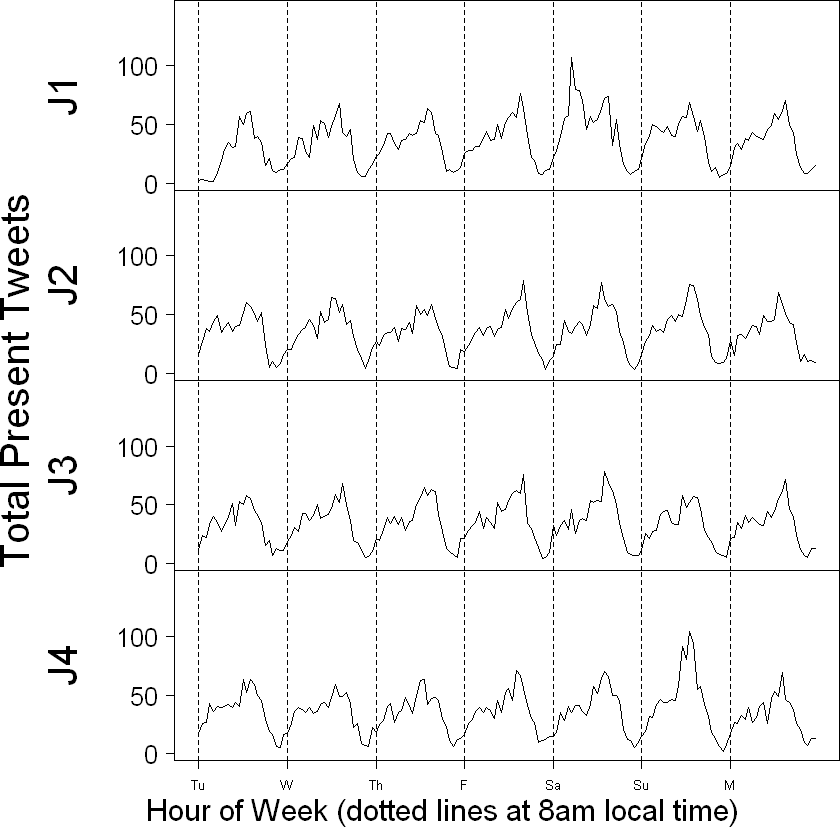

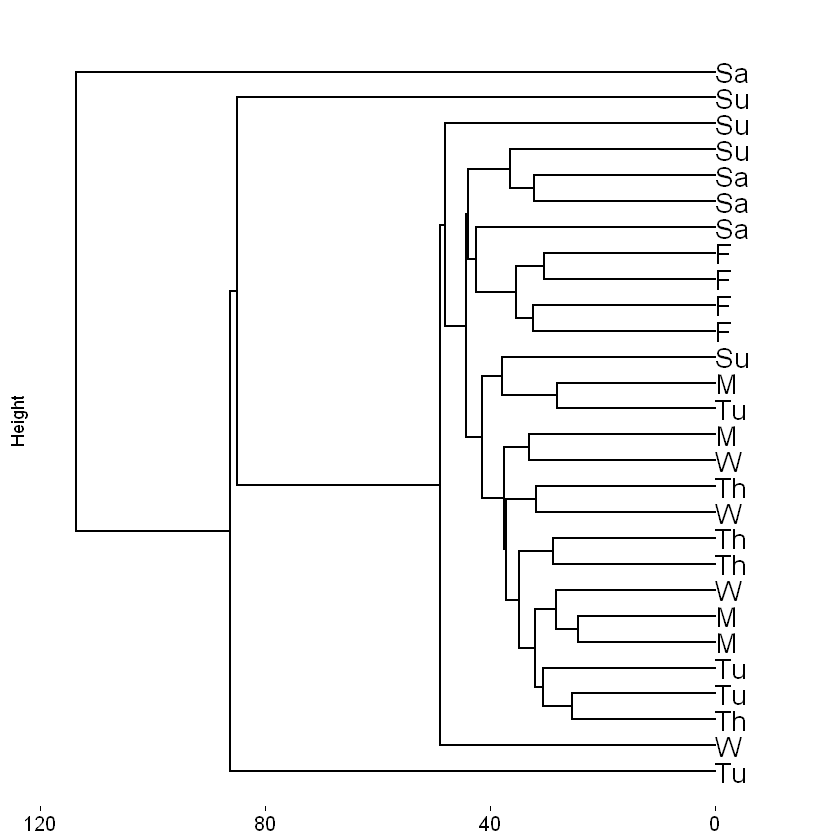

In [366]:
plot_all('c:/users/tom/documents/nyu-test/tob-run2/june/summary/summary/fp.csv', plot_max=150)

# The following plots are of SEPTEMBER data

# present hourly, september

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


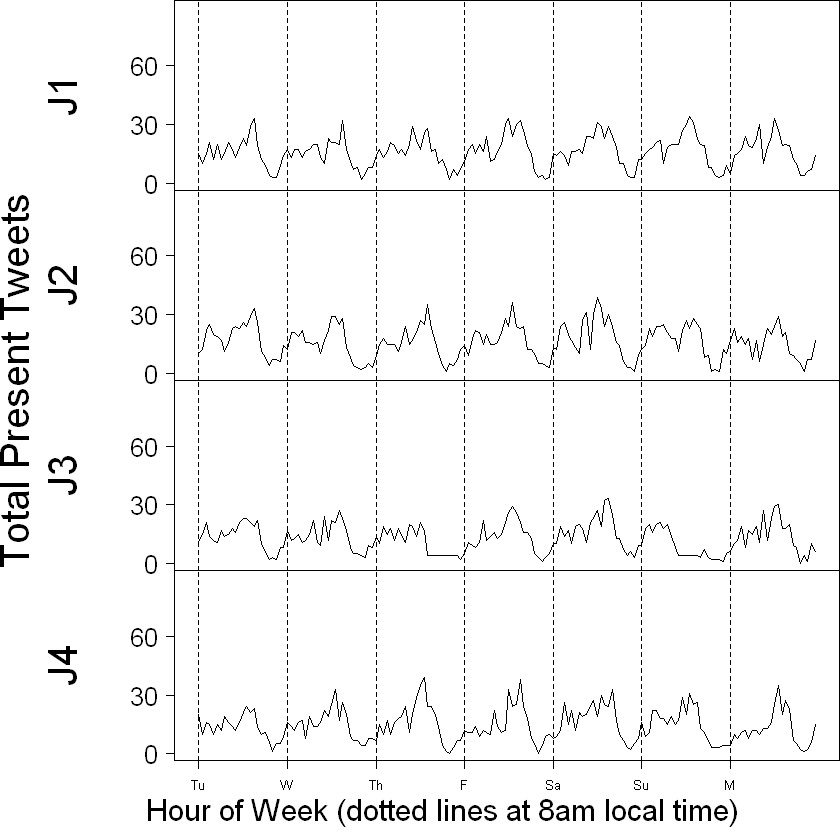

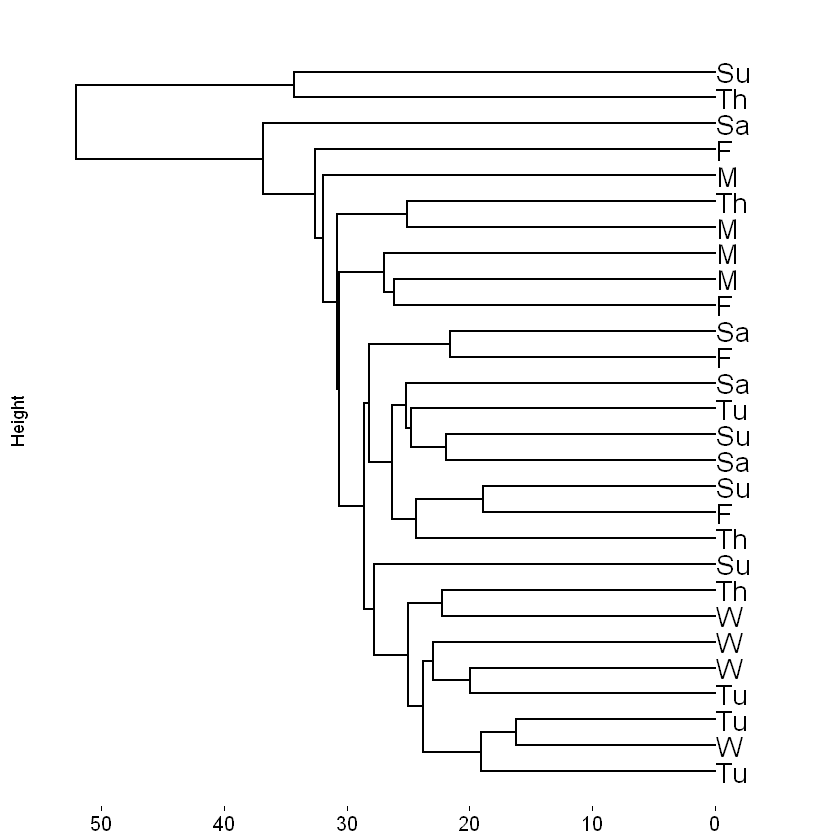

In [367]:
plot_all('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/present.csv', 90, date_range=9:(672+8)) 

# current hourly, septmber

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


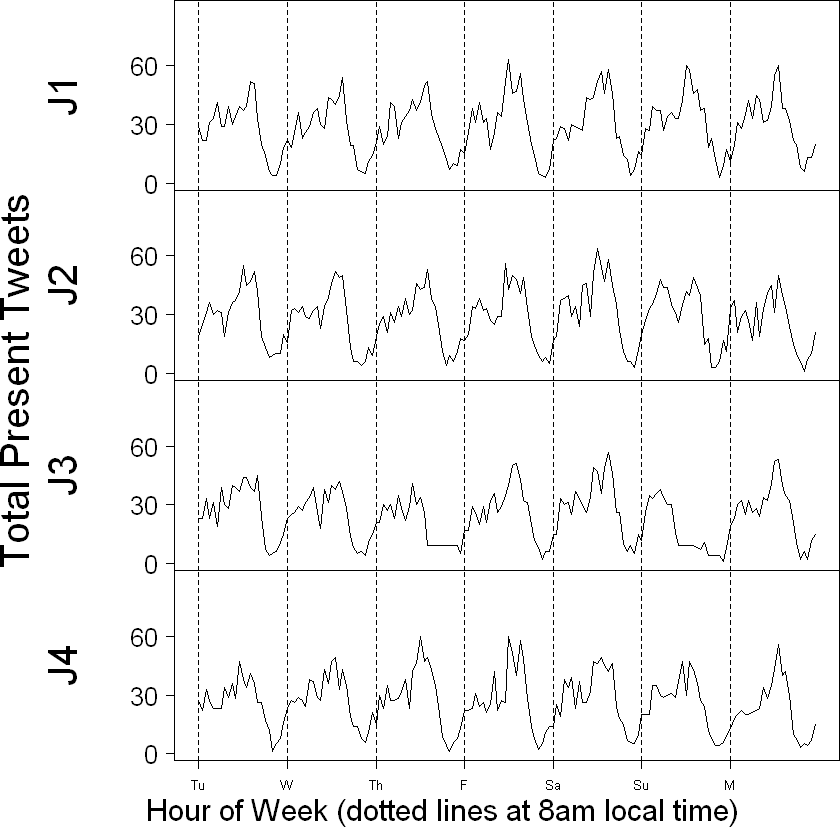

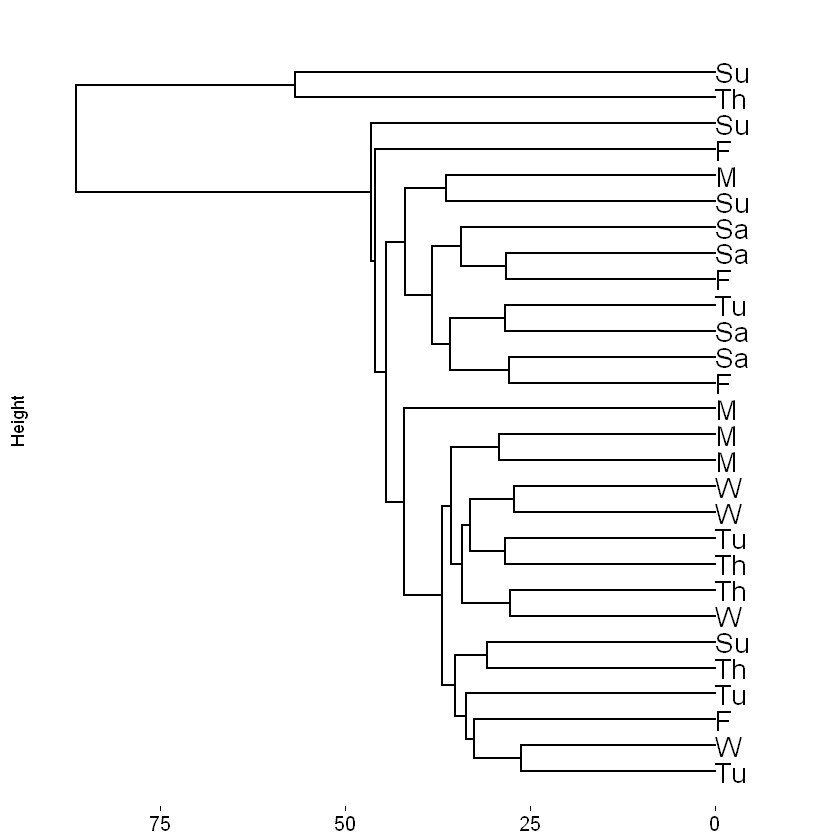

In [371]:
plot_all('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/current.csv', 90, date_range=9:(672+8)) 

# shisha hourly, sept

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


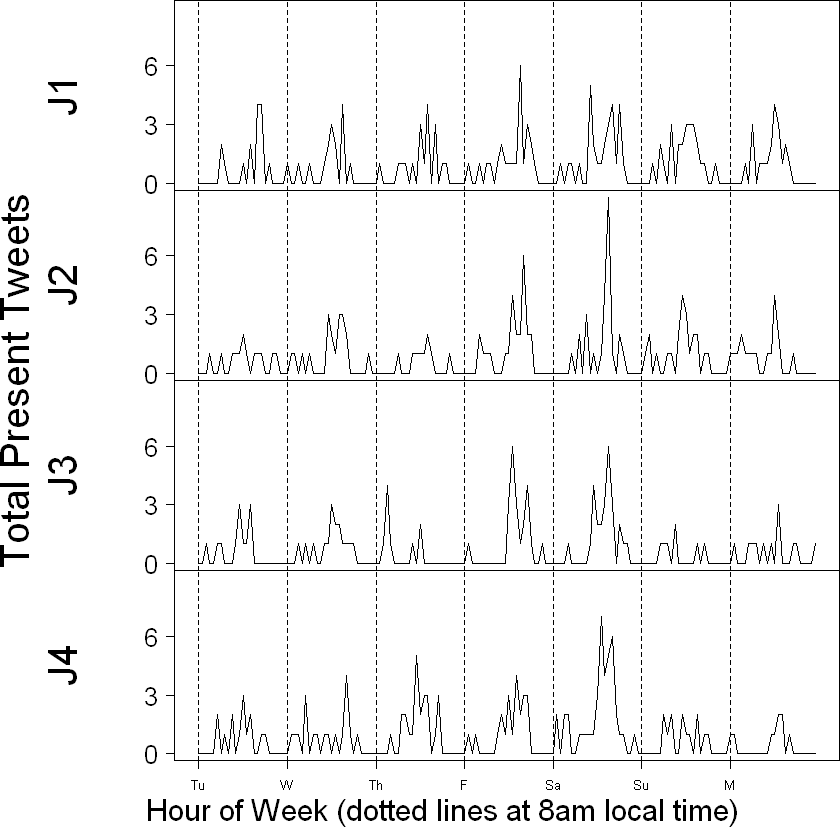

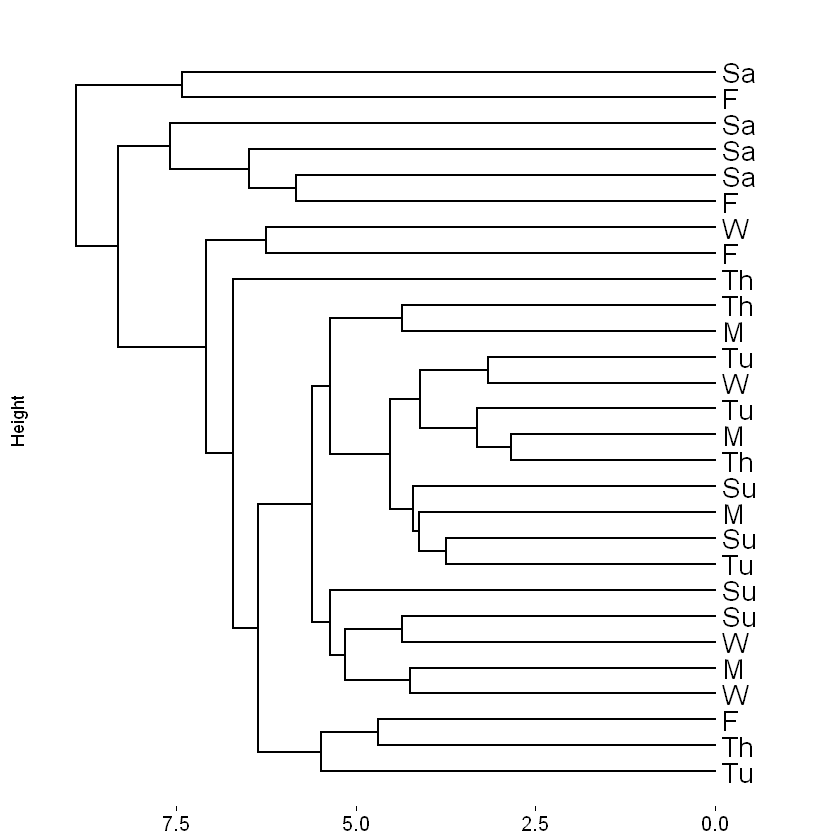

In [372]:
plot_all('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv', 9, date_range=9:(672+8)) 

# present 6 hour blocks, sept

  [1]  44  83  97 135  50  87  99 127  50  76 106 138  55  74  99 169  74  64
 [19]  97 159  69  77 111 165  62  64 124 141  55  90 106 159  63  93  95 150
 [37]  33  65  96 148  40  82 102 156  68  82 118 168  66  78 130 136  44  97
 [55]  78 136  39  85  87 123  45  73  80 129  42  75  94  75  35  88 138  54
 [73]  61  95 155  68  75 101  21  15  81 121 103  41  78  98 103  42  86 110
 [91] 112  38  86 138 125  30  68 102 137  36  96 130 139  41 100 115 113  21
[109]  61  89 117  43


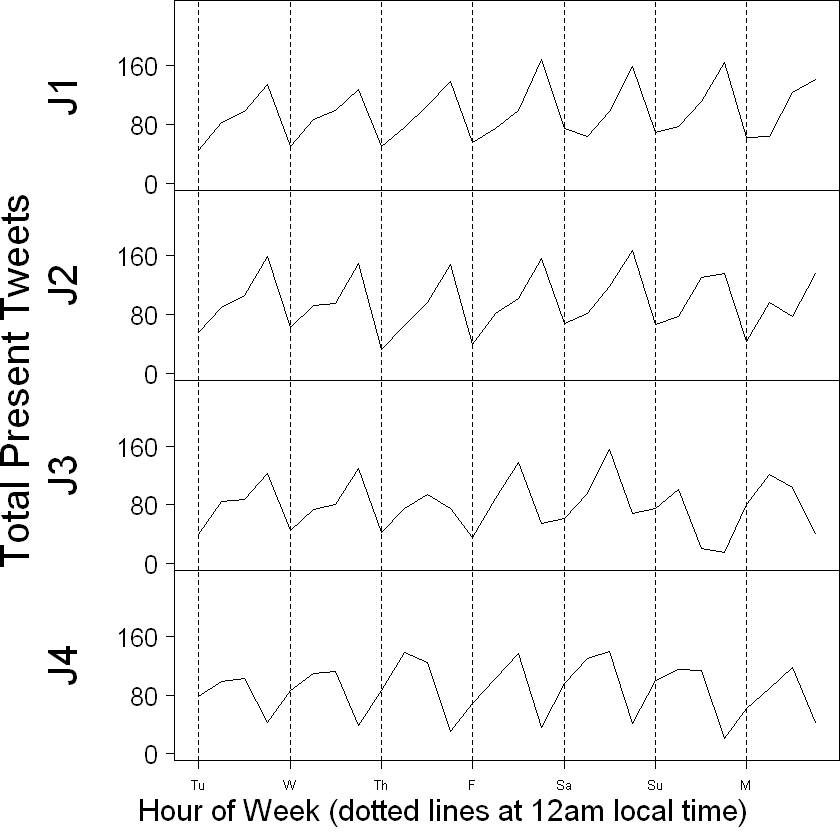

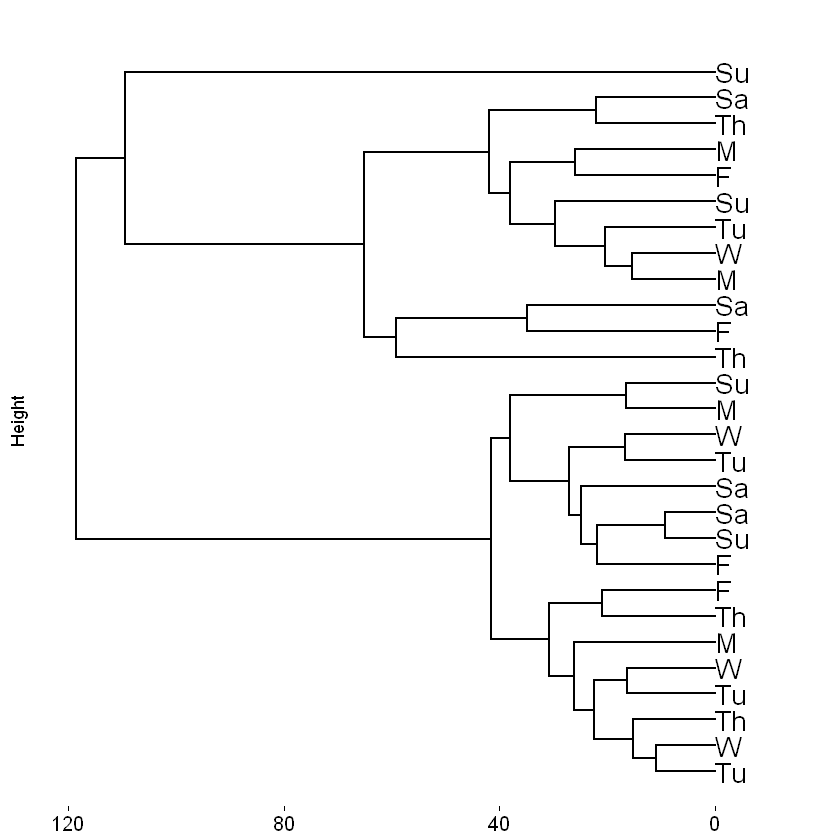

In [373]:
plot_6hour('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/present.csv', plot_max=240, date_range=1:(28*4))

# current 6 hour blocks, sept

  [1]  84 135 201 252  81 130 182 254  88 119 205 258  99 136 184 298 117 112
 [19] 180 300 123 131 204 287 131 116 229 262 101 144 179 278 101 142 180 270
 [37]  67 116 188 256  89 133 184 267 130 124 218 303 125 130 243 236  85 148
 [55] 164 241  63 133 187 240  91 129 175 226  65 125 167 140  94 164 248 105
 [73] 105 182 272 123 126 184  40  33 168 211 192  64 151 212 180  65 171 219
 [91] 193  75 170 241 207  54 147 202 239  54 178 214 224  63 169 204 189  44
[109] 121 185 186  60


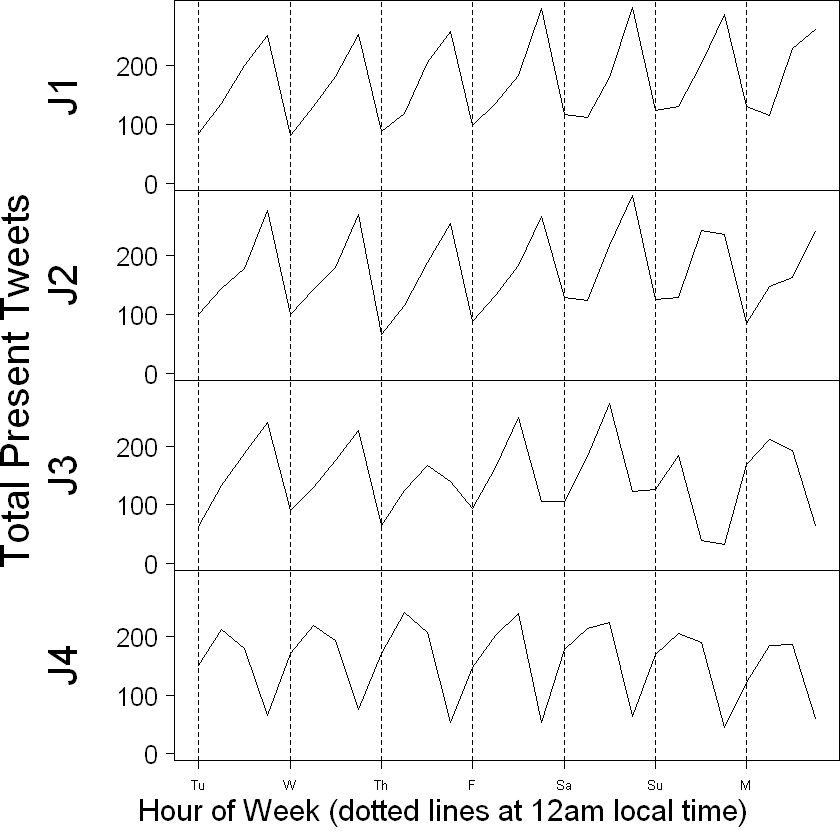

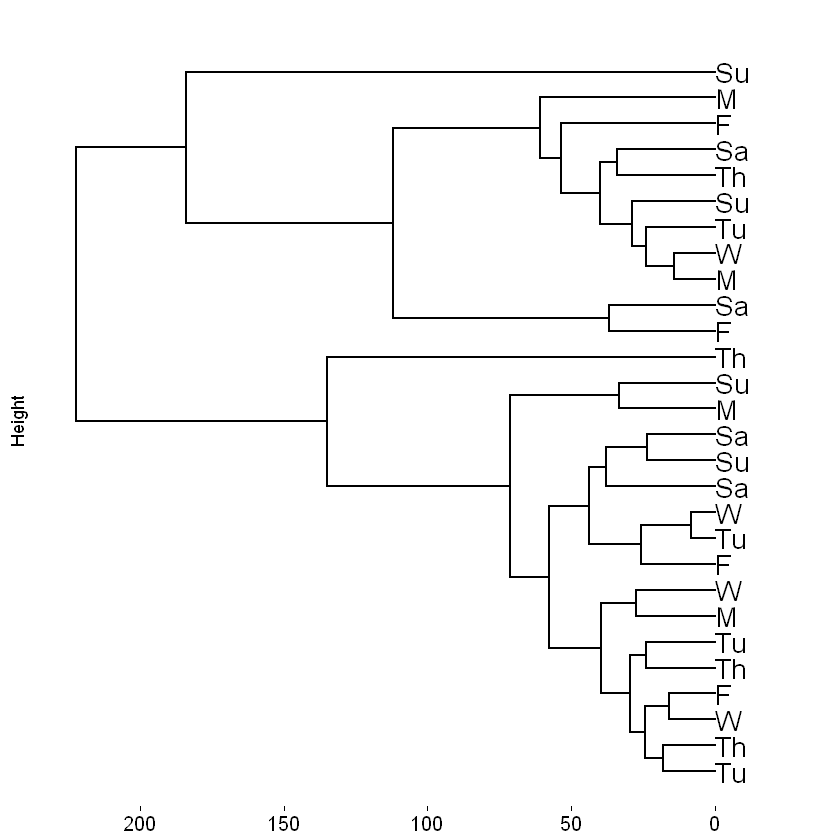

In [375]:
plot_6hour('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/current.csv', plot_max=300, date_range=1:(28*4))

# shisha 6 hour blocks, sept

  [1]  1  0  3  3  9  2  1 12  1  1  3  9  5  1  4 12  7  1  3 14 10  1  6 15  3
 [26]  0  6 13  1  1  2  6  4  2  2 12  2  1  1  7  1  0  5 10 10  0  6 15  4  3
 [51]  3 14  2  5  4  8  1  1  2  9  0  1  2 10  3  5  1  3  1  0 13  8  0  1 18
 [76]  7  0  5  2  0  3  3  5  1  2  7  5  0  6  4  7  1  1 13 10  0  2  7 13  0
[101]  6  8 25  2  2  6  5  1  1  2  5  2


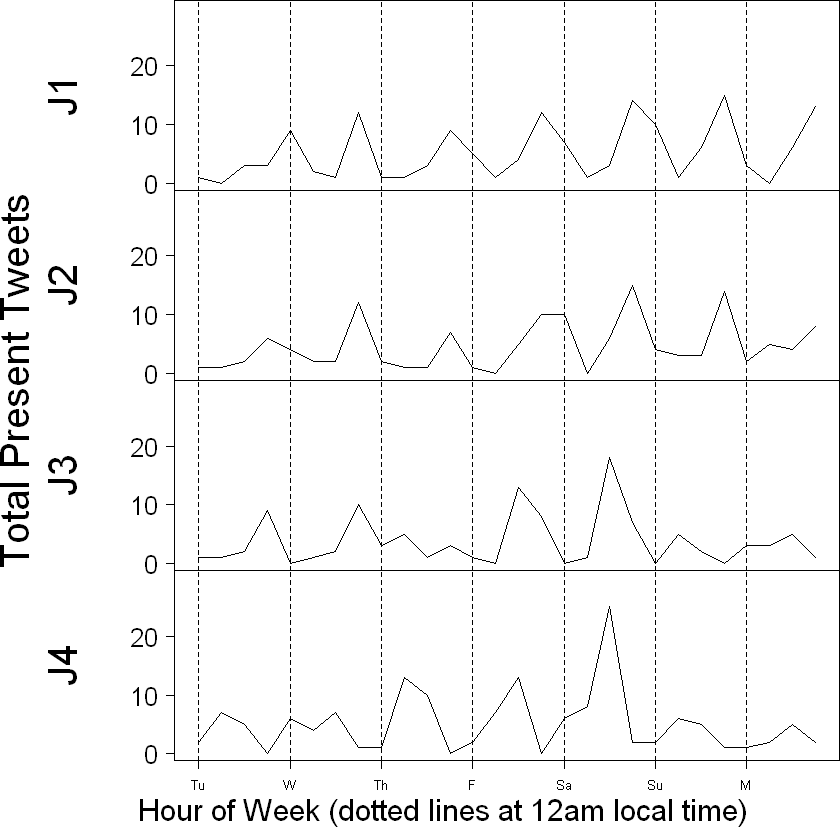

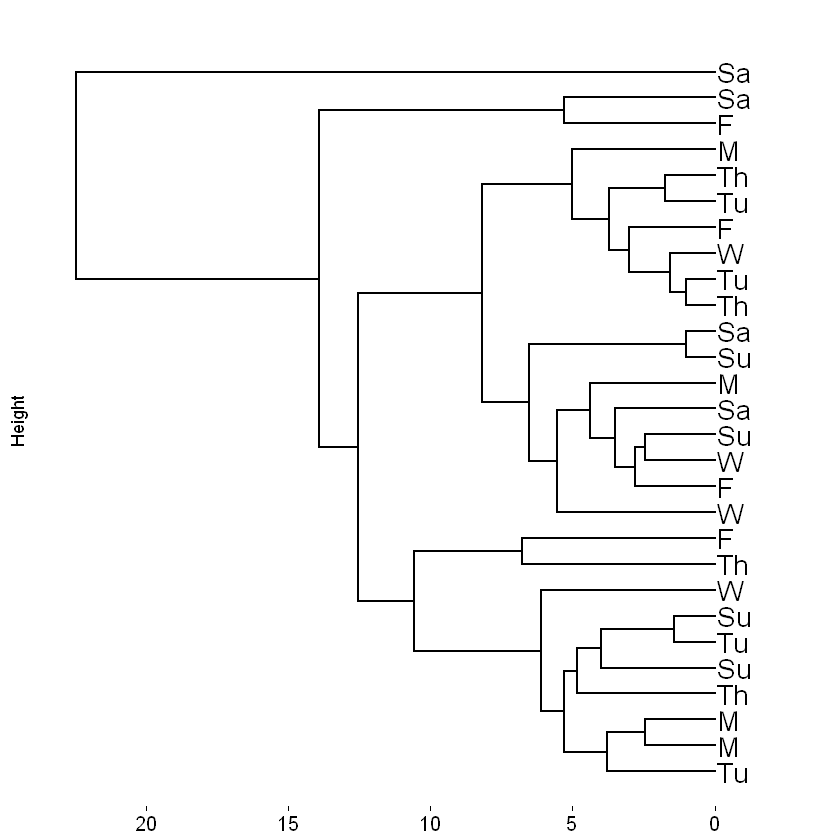

In [376]:
plot_6hour('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv', plot_max=30, date_range=1:(28*4))

# shisha/fp tobacco, hourly, sept

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


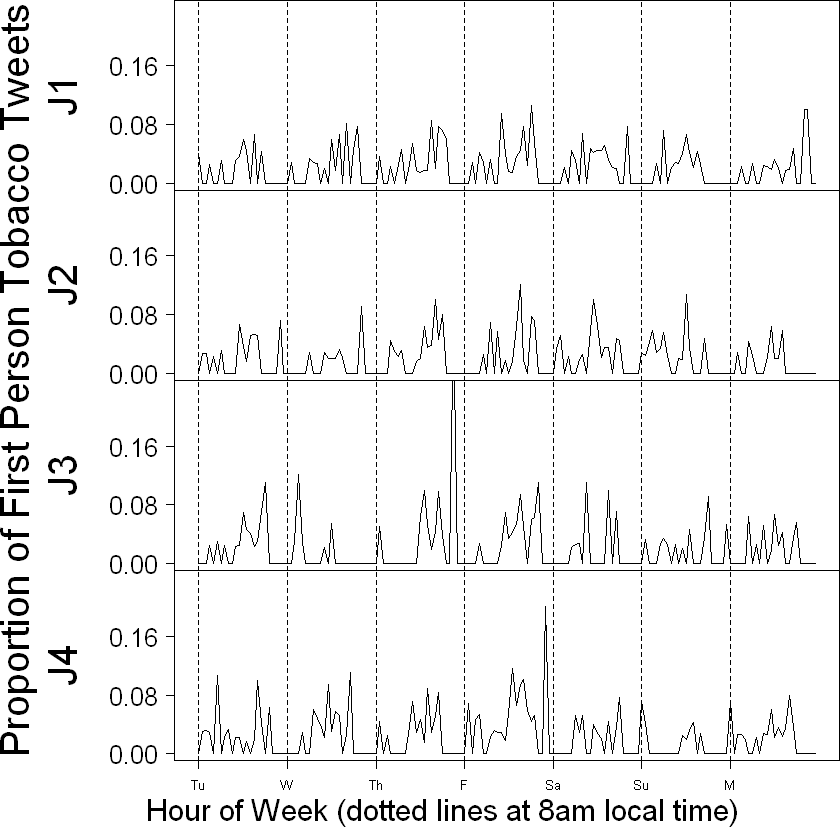

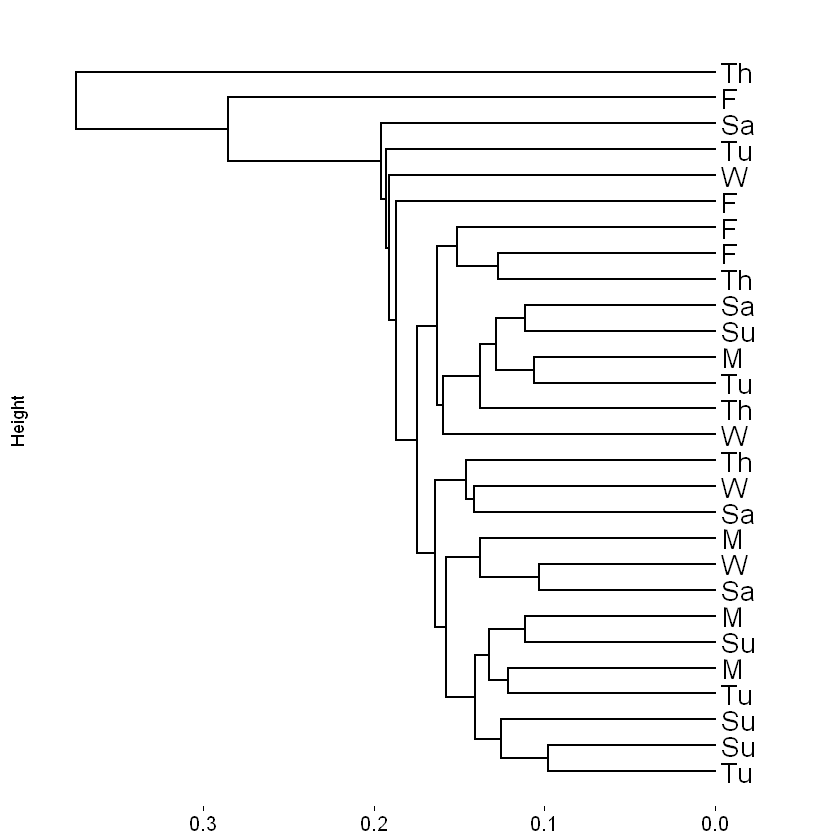

In [377]:
plot_prop('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/shisha.csv',
          'c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv', 0.24)

# for reference, here is the plot of fp tobacco (ignore the dendogram)

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


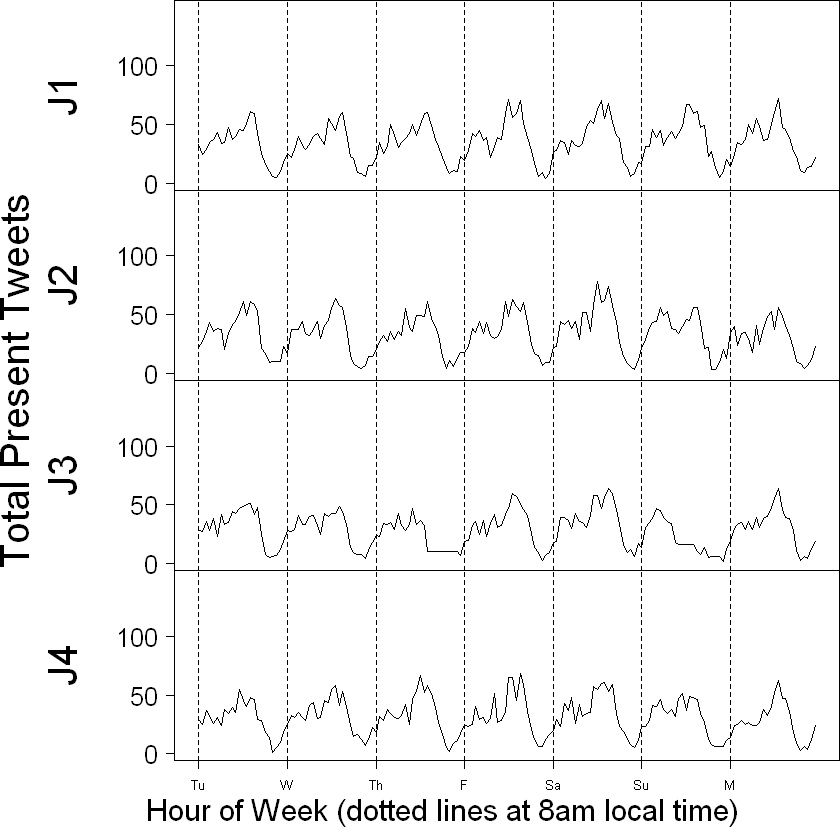

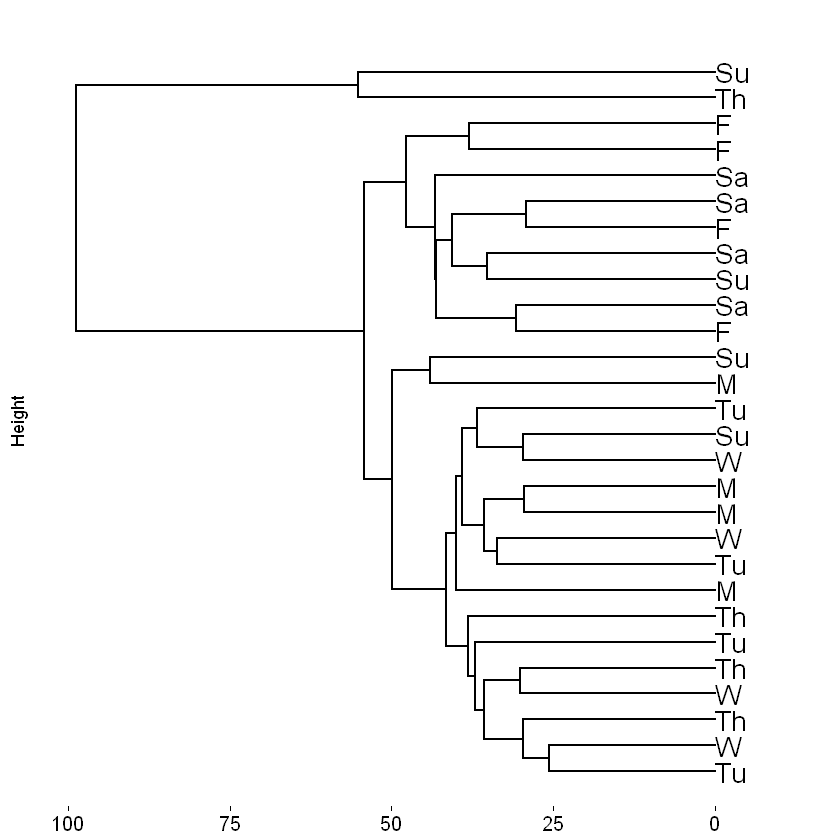

In [378]:
plot_all('c:/users/tom/documents/nyu-test/tob-run2/sept/summary/summary/fp.csv', plot_max=150, date_range=9:(672+8))

In [6]:
j_tob <- read.csv('c:/users/tom/documents/nyu-test/tob-run/june/summary/summary/present.csv')

In [7]:
head(j_tob)

day,hour,sum,len
1,0,0,6004
1,1,2,3852
1,2,0,2415
1,3,0,1762
1,4,0,1648
1,5,0,2091


In [8]:
pres <- j_tob[c(1,2,3)]
tot <- j_tob[c(1,2,4)]

In [9]:
new <- preprocessing_df(pres, tot)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


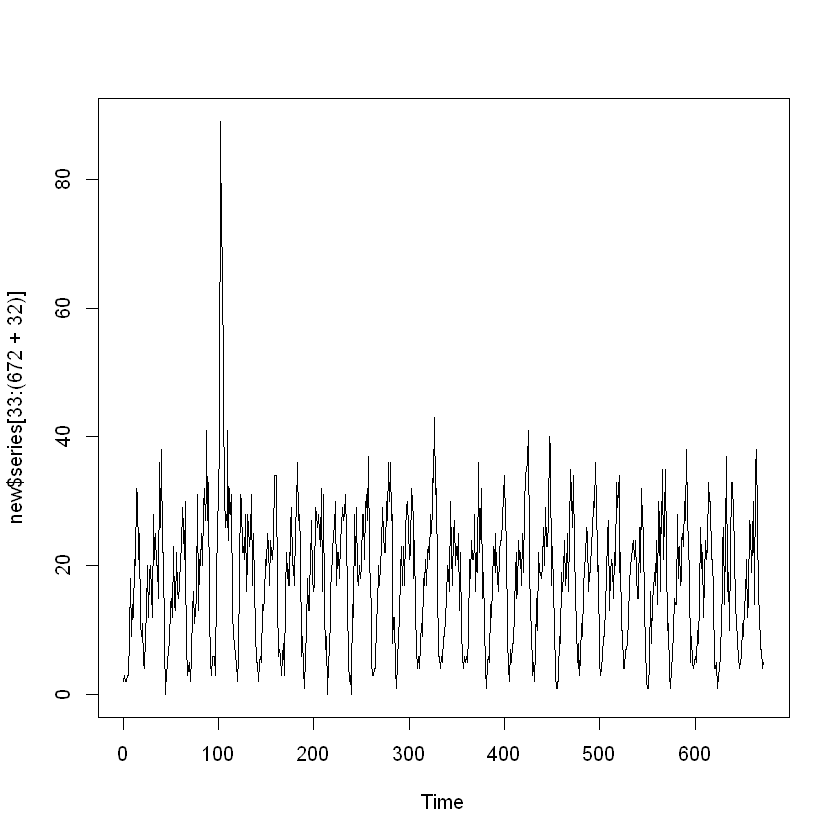

In [10]:
plot.ts(new$series[33:(672+32)])

In [11]:
new_perc <- ts((new$series/new$total)[33:(672+32)], frequency=24)

In [12]:
ts_pres <- ts((new$series)[33:(672+32)], frequency=24)

In [13]:
new.1 = as.numeric(window(new_perc, start=c(1, 1), end= c(7, 24)))
new.2 = as.numeric(window(new_perc, start=c(8, 1), end= c(14, 24)))
new.3 = as.numeric(window(new_perc, start=c(15, 1), end= c(21, 24)))
new.4 = as.numeric(window(new_perc, start=c(22, 1), end= c(28, 24)))
pres.1 = as.numeric(window(ts_pres, start=c(1, 1), end= c(7, 24)))
pres.2 = as.numeric(window(ts_pres, start=c(8, 1), end= c(14, 24)))
pres.3 = as.numeric(window(ts_pres, start=c(15, 1), end= c(21, 24)))
pres.4 = as.numeric(window(ts_pres, start=c(22, 1), end= c(28, 24)))

In [14]:
weeks = data.frame(new.1, new.2, new.3, new.4)
abs_tob = data.frame(pres.1, pres.2, pres.3, pres.4)

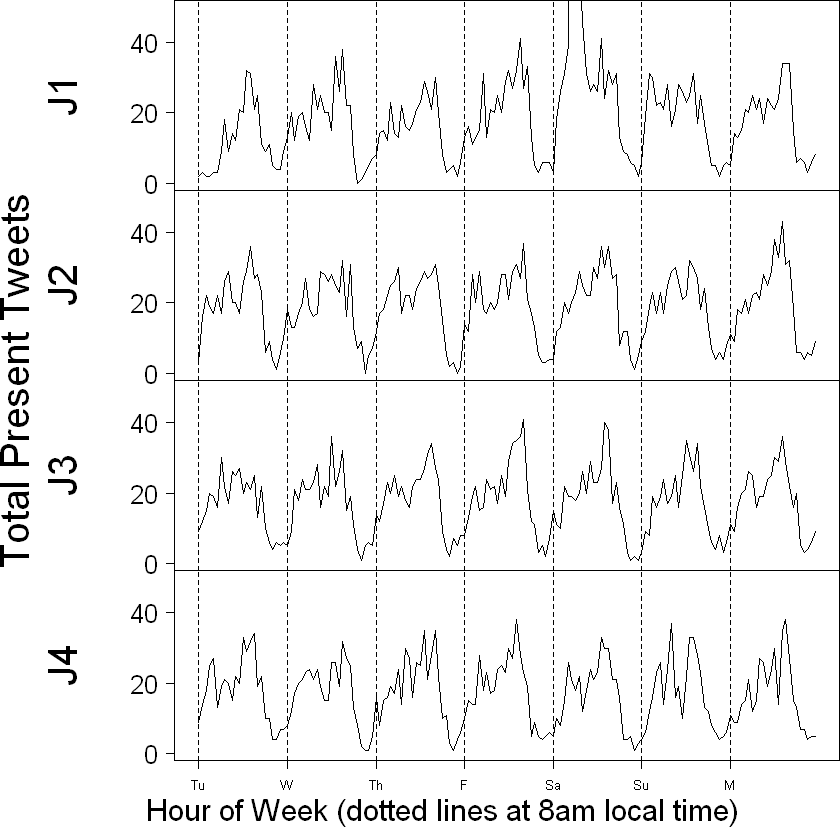

In [27]:
# Absolute number of tweets per hour
plot_weeks <- function(ts){
#     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4')
par(mfrow=c(4,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:4){
    # remove space for x-axis
    par(mar = c(0, 8, 0, 0))
    yrange = c(0, 50)
    plot(ts[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(cex.lab =3, ylab=week_names[col], line=6)
    axis(2, labels = c('0', '20', '40'), at=c(0, 20, 40), las = 1, cex.axis=2)
    abline(v=seq(1, 168, by=24), lty=2)

}

mtext('Total Present Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks(abs_tob)

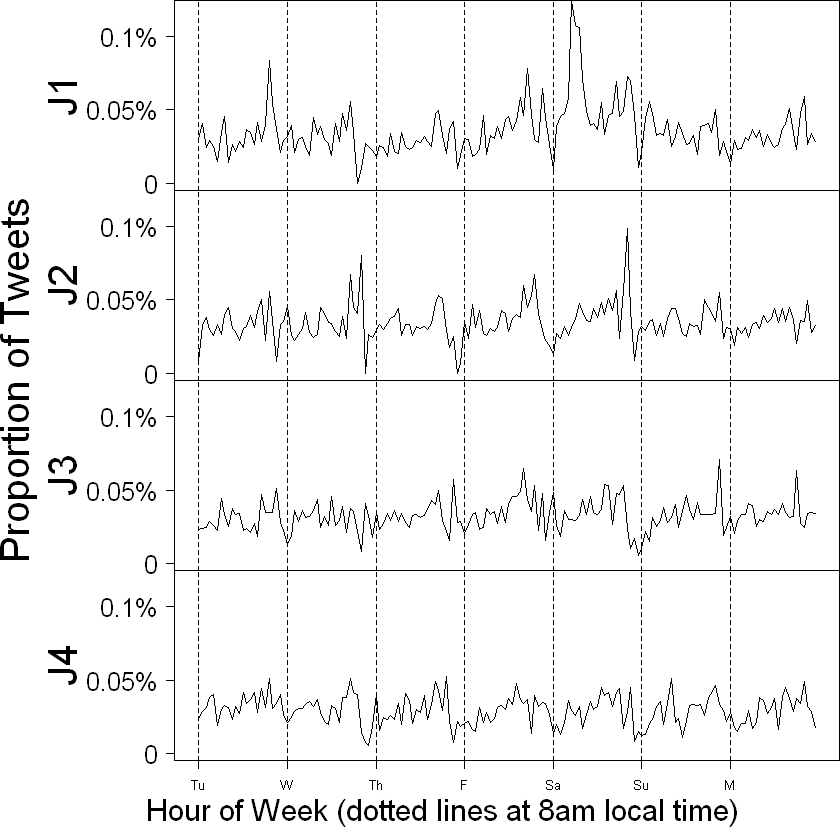

In [17]:
# proportion of tweets per hour
plot_weeks <- function(){
#     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4')
par(mfrow=c(4,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:4){
    # remove space for x-axis
    par(mar = c(0, 8, 0, 0))
    yrange = c(0, 0.0012)
    plot(weeks[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(cex.lab =3, ylab=week_names[col], line=6)
    axis(2, labels = c('0', '0.05%', '0.1%'), at=c(0, 0.0005, 0.001), las = 1, cex.axis=2)
    abline(v=seq(1, 168, by=24), lty=2)

}

mtext('Proportion of Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks()

In [19]:
library('TSclust')

Warning message:
"package 'TSclust' was built under R version 3.3.3"Loading required package: wmtsa
Warning message:
"package 'wmtsa' was built under R version 3.3.3"Loading required package: pdc
Warning message:
"package 'pdc' was built under R version 3.3.3"Loading required package: cluster


In [20]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [21]:
weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 4)

In [22]:
ts_pres

Time Series:
Start = c(1, 1) 
End = c(28, 24) 
Frequency = 24 
  [1]  2  3  2  2  3  3  9 18  9 14 12 21 20 32 31 21 25 11  9 11  5  4  4  9 13
 [26] 20 12 19 20 16 12 28 21 25 20 20 15 36 26 38 22 22  8  0  1  3  5  7  8 14
 [51] 15 12 23 14 13 22 16 15 17 21 23 29 26 21 30 20  8  3  4  5  2  6 13 16 11
 [76] 13 15 31 13 21 20 25 20 29 32 27 32 41 27 33 13  5  3  6  6  6  3 18 26 31
[101] 39 89 70 69 46 31 26 28 26 41 24 32 28 31 13  9  8  6  5  2  6 19 31 30 22
[126] 23 21 28 16 21 28 26 23 25 31 17 25 17 10  5  5  2  5  6  5 14 13 15 21 20
[151] 25 21 24 17 24 22 21 24 34 34 34 15  6  7  6  3  6  8  3 16 22 19 17 22 17
[176] 26 29 20 20 17 26 29 36 27 28 23  6  9  4  1  6 10 18 13 13 17 20 27 18 16
[201] 17 29 28 26 28 25 23 32 16 31 13  7  9  0  5  7 12 17 18 22 25 26 30 17 22
[226] 22 18 24 26 29 27 28 31 25 15  5  2  3  0  2 14 12 28 20 29 18 17 20 18 20
[251] 28 28 21 29 31 27 37 21 17 13  5  3  3  4  4 12 13 20 17 20 23 29 25 22 22
[276] 30 27 36 30 36 27 28  8 12 12  4  1  5  

In [23]:
june_days = split_by_day(new_perc)
colnames(june_days)=weekdays
dist = diss(june_days, METHOD = 'EUCL')
b = agnes(dist, diss=TRUE)

Percentage of total tweets time series dendogram:

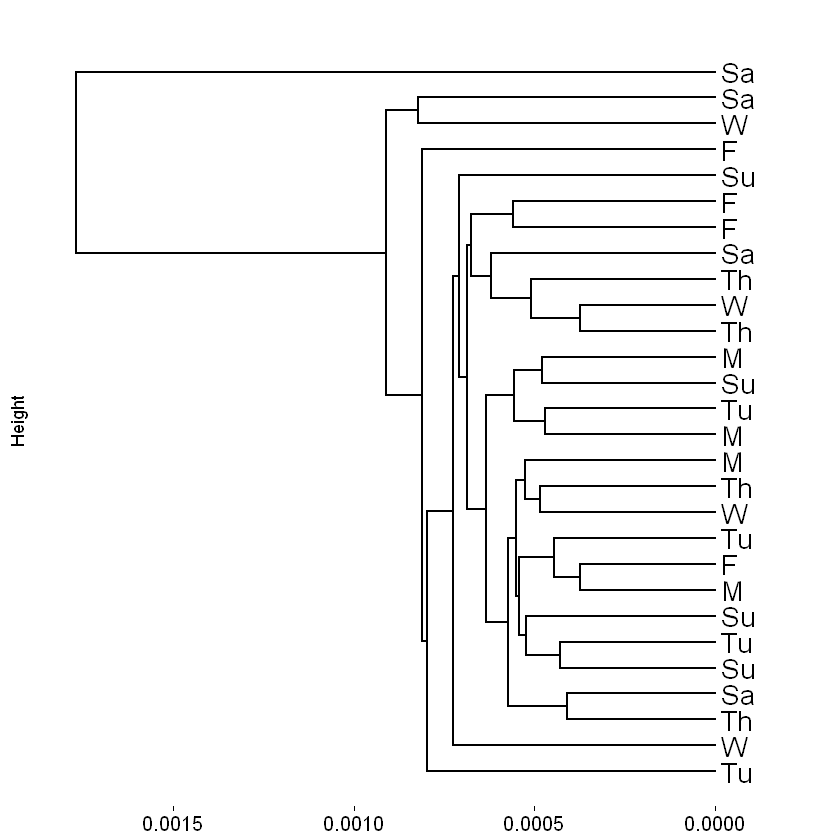

In [24]:
euc_dend <-function(){
    fviz_dend(b, rect=TRUE, main='', ylab='', xlab='Height', 
              las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, cex=1.5)
}
euc_dend()

Absolute number of tweets per hour time series:

In [25]:
june_days = split_by_day(ts_pres)
colnames(june_days)=weekdays
dist = diss(june_days, METHOD = 'EUCL')
c = agnes(dist, diss=TRUE)

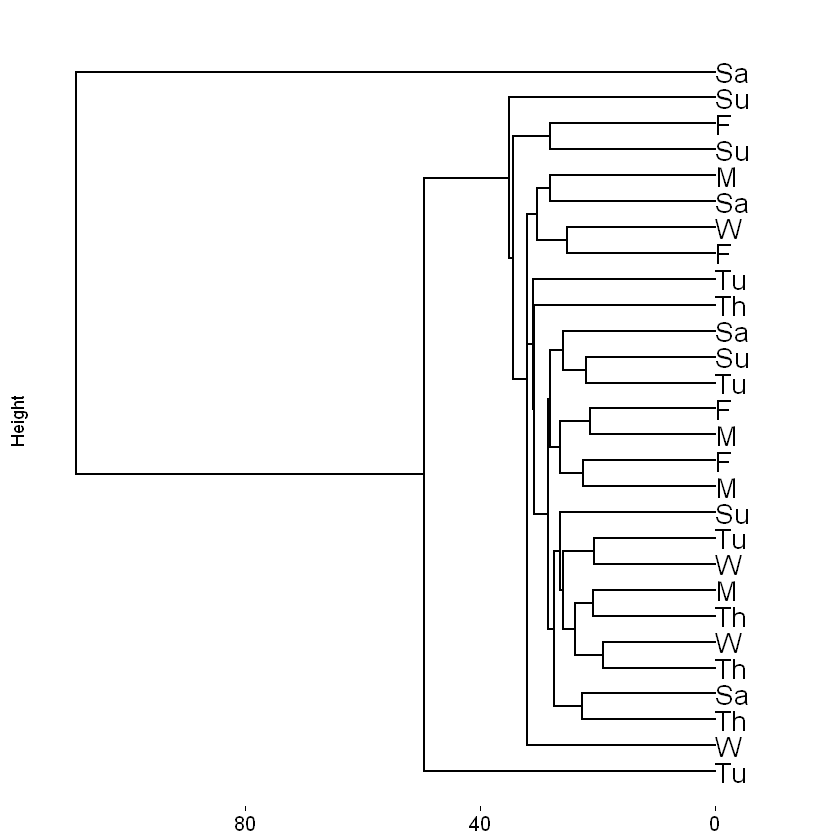

In [26]:
euc_dend <-function(){
    fviz_dend(c, rect=TRUE, main='', ylab='', xlab='Height', 
              las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    #mtext( text='Day of Week', side=2, cex=1.5)
}
euc_dend()